<a href="https://colab.research.google.com/github/KubraErensoy/TrendyolFinalProject/blob/main/Trendyol_Buzdolab%C4%B1_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import SnowballStemmer
from textblob import TextBlob
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [11]:
data=pd.read_excel("trendyolbuzdolabi.xlsx")

In [12]:
data.head()

,ÜRÜN ADI,MARKA ADI,MODEL ADI,TOPLAM HACIM,YUKSEKLIK,GENISLIK,DONDURUCU ÖZELLİĞİ,TIP,ENERJİ_SINIFI,GARANTİ_SURESI,RENK,DERINLIK,DONDURUCU YERİ,PRICE,POINTS,YORUMLAR
0,NF45001 No-Frost Refrigerator 20263687,VESTEL,NF45001,600.0,NaN,NaN,No Frost,Double Door,F,3.0,White,NaN,NaN,7829.0,4.5,"We bought it while it was on sale, thank you v..."
1,NF45001 No-Frost Refrigerator 20263687,VESTEL,NF45001,600.0,NaN,NaN,No Frost,Double Door,F,3.0,White,NaN,NaN,7829.0,4.5,"I bought it before, I am very satisfied. Now I..."
2,NF45001 No-Frost Refrigerator 20263687,VESTEL,NF45001,600.0,NaN,NaN,No Frost,Double Door,F,3.0,White,NaN,NaN,7829.0,4.5,It is very useful and cools down wonderfully. ...
3,NF45001 No-Frost Refrigerator 20263687,VESTEL,NF45001,600.0,NaN,NaN,No Frost,Double Door,F,3.0,White,NaN,NaN,7829.0,4.5,very good price product
4,NF45001 No-Frost Refrigerator 20263687,VESTEL,NF45001,600.0,NaN,NaN,No Frost,Double Door,F,3.0,White,NaN,NaN,7829.0,4.5,product arrived ok thank you


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3654 entries, 0 to 3653
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ÜRÜN ADI            3654 non-null   object 
 1   MARKA ADI           3654 non-null   object 
 2   MODEL ADI           3654 non-null   object 
 3   TOPLAM HACIM        2993 non-null   float64
 4   YUKSEKLIK           2206 non-null   float64
 5   GENISLIK            2257 non-null   float64
 6   DONDURUCU ÖZELLİĞİ  3641 non-null   object 
 7   TIP                 3640 non-null   object 
 8   ENERJİ_SINIFI       3648 non-null   object 
 9   GARANTİ_SURESI      3561 non-null   float64
 10  RENK                3654 non-null   object 
 11  DERINLIK            2248 non-null   float64
 12  DONDURUCU YERİ      2176 non-null   object 
 13  PRICE               3654 non-null   float64
 14  POINTS              3654 non-null   float64
 15  YORUMLAR            3654 non-null   object 
dtypes: flo

In [14]:
df=data[["POINTS","YORUMLAR"]]
df.head()

,POINTS,YORUMLAR
0,4.5,"We bought it while it was on sale, thank you v..."
1,4.5,"I bought it before, I am very satisfied. Now I..."
2,4.5,It is very useful and cools down wonderfully. ...
3,4.5,very good price product
4,4.5,product arrived ok thank you


In [15]:
df=df.rename( columns={ 'POINTS'   :'points','YORUMLAR' :'comments'})

In [16]:
df["points"].value_counts()

4.5    541
4.4    529
4.6    505
4.7    393
4.3    255
5.0    245
4.2    239
4.8    130
3.8    127
4.0    127
3.9    115
4.9    112
4.1    109
3.5     48
3.0     42
3.7     34
3.2     26
1.0     16
3.4     15
3.3      9
2.8      9
2.7      8
3.6      7
2.5      5
2.0      3
1.5      2
2.3      2
0.0      1
Name: points, dtype: int64

In [17]:
df.loc[(df["points"] > 4.5),"points"]= 5
df.loc[(df["points"] > 3.5) & (df["points"] <= 4.5), "points"] = 4
df.loc[(df["points"] > 2.5) & (df["points"] <= 3.5), "points"] = 3
df.loc[(df["points"] > 1.5) & (df["points"] <= 2.5), "points"] = 2
df.loc[(df["points"] >= 0) & (df["points"] <= 1.5), "points"] = 1

In [18]:
df

,points,comments
0,4.0,"We bought it while it was on sale, thank you v..."
1,4.0,"I bought it before, I am very satisfied. Now I..."
2,4.0,It is very useful and cools down wonderfully. ...
3,4.0,very good price product
4,4.0,product arrived ok thank you
...,...,...
3649,5.0,Packaging was very good. The cargo also arrive...
3650,5.0,The cooling is extremely successful. It was pa...
3651,4.0,I highly recommend it
3652,4.0,Such a high price can be so poor quality compa...


Text(0.5, 1.0, 'Distribution of Point')

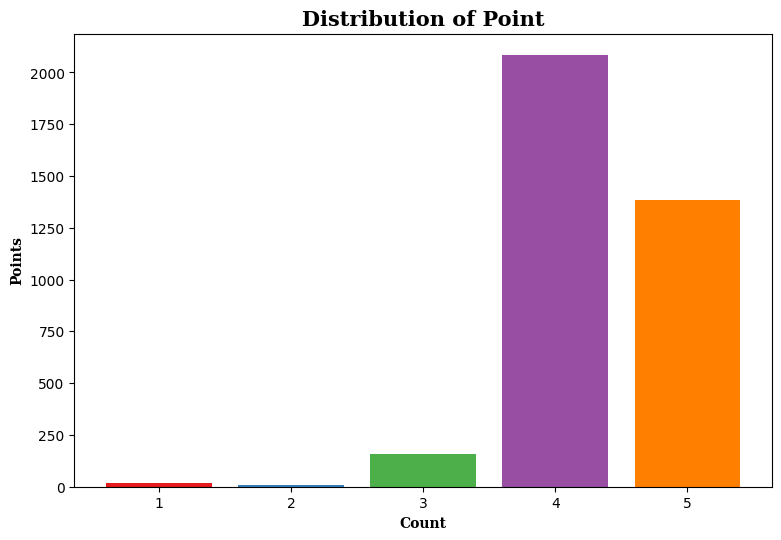

In [19]:
point_dist = df.groupby("points").count().reset_index()
point_dist
col_map = plt.get_cmap('Set1')
plt.figure(figsize=(9,6),dpi=100)
plt.bar(point_dist.points, point_dist.comments,color=col_map.colors);
plt.xlabel("Count",weight="bold", family='serif', c="Black", fontsize=10)
plt.ylabel("Points", weight="bold", family='serif', c="Black", fontsize=10)
plt.title("Distribution of Point", family='serif',fontsize = 15,loc='center',color='black',weight="bold")

In [20]:
df["points"].value_counts()


4.0    2083
5.0    1385
3.0     157
1.0      19
2.0      10
Name: points, dtype: int64

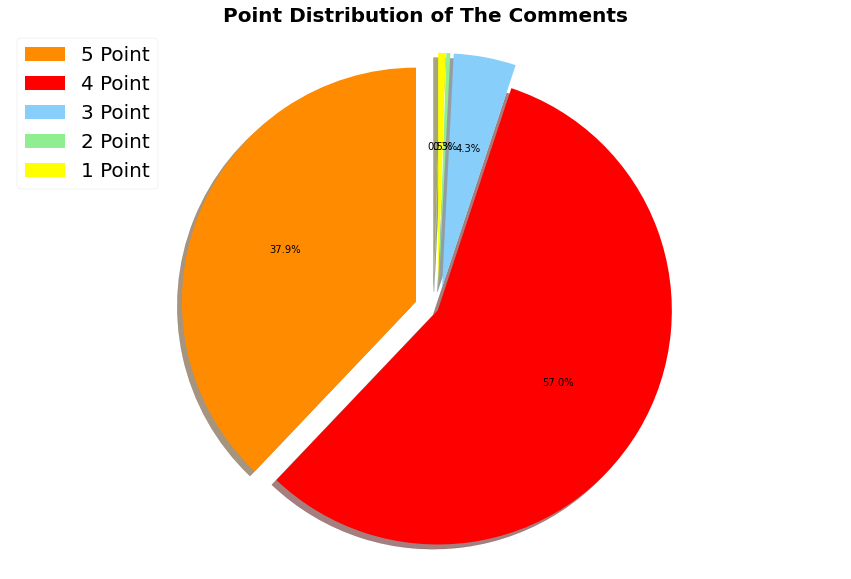

In [21]:
plt.style.use('seaborn-notebook')
fig1, ax1 = plt.subplots(figsize =(15, 10))
label = '5 Point', '4 Point', '3 Point', '2 Point','1 Point'
point_count = [1385,2083, 157, 10, 19]
colors_list = ["darkorange",'red','lightskyblue' ,'lightgreen', 'yellow']
explode = (0.1, 0,  0.1 ,0.1,0.1)  
ax1.pie(point_count, explode=explode,  autopct='%1.1f%%',
        shadow=True, startangle=90,colors=colors_list)
plt.title("Point Distribution of The Comments", weight="bold", c="Black", fontsize=20)
plt.axis('equal') 
plt.legend(labels=label, loc='upper left',fontsize=20) 
plt.show()

# **SENTIMENT OF POINTS**

In [22]:
def sentiment(points):
    if points >= 4:
        return "Positive"
    elif points == 3:
        return "Neutral"
    else:
        return "Negative"

In [23]:
df["sentiment"] = df["points"].apply(sentiment)


In [24]:
df.head()

,points,comments,sentiment
0,4.0,"We bought it while it was on sale, thank you v...",Positive
1,4.0,"I bought it before, I am very satisfied. Now I...",Positive
2,4.0,It is very useful and cools down wonderfully. ...,Positive
3,4.0,very good price product,Positive
4,4.0,product arrived ok thank you,Positive


In [25]:
df.sentiment.value_counts()

Positive    3468
Neutral      157
Negative      29
Name: sentiment, dtype: int64

<Figure size 1080x720 with 0 Axes>

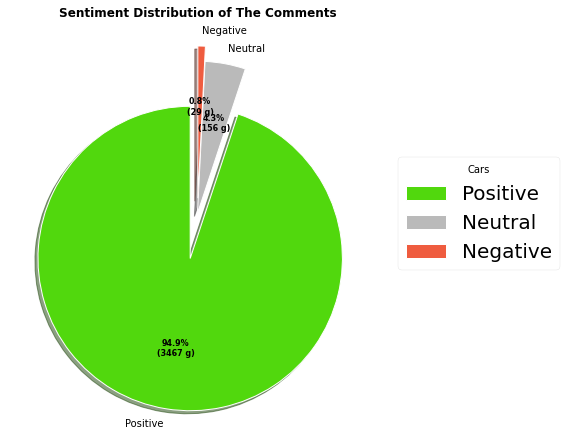

In [26]:
plt.figure(figsize = [15, 10])
label = ['Positive', 'Neutral', 'Negative']
point_count = [3468, 157, 29]
explode=(0.3,0,0.1)
colors=("#51d80d","#bababa","#ef5c3f")
wp = { 'linewidth' : 1, 'edgecolor' : "white" }


# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d} g)".format(pct, absolute)

fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(point_count,
                                  autopct = lambda pct: func(pct, point_count),
                                  explode = explode,
                                  labels = label,
                                  shadow = True,
                                  colors = colors,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="black"))
 
 # Adding legend
ax.legend(wedges, label,
          title ="Cars",
          loc ="center left",
          fontsize=20,
          bbox_to_anchor =(1, 0, 0.5, 1))
 
plt.setp(autotexts, size = 8, weight ="bold")
ax.set_title("Sentiment Distribution of The Comments", c="black", fontsize=12, weight="bold")
 
# show plot
plt.show()

Text(0.5, 1.0, 'Distribution of Sentiment')

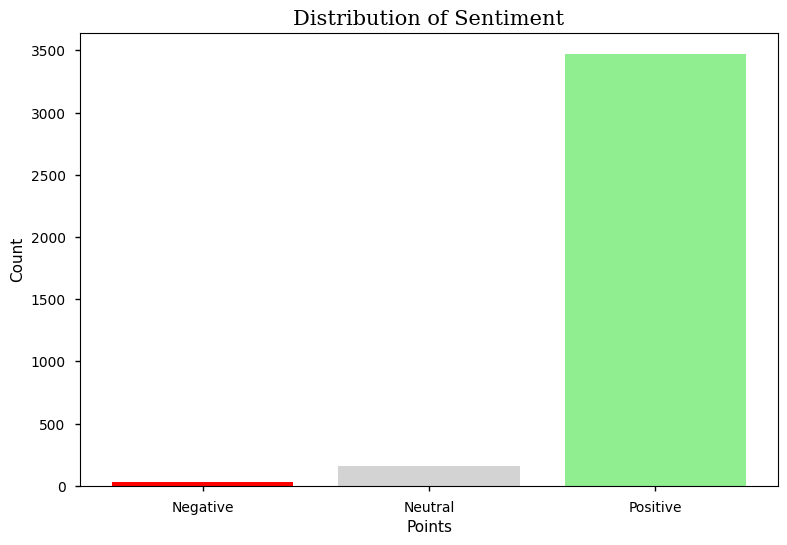

In [27]:
sentiment_dist = df.groupby("sentiment").count().reset_index()
sentiment_dist
plt.figure(figsize=(9,6),dpi=100)
colors=['red','lightgrey','lightgreen']
plt.bar(sentiment_dist.sentiment, sentiment_dist.points,color=colors);
plt.xlabel("Points")
plt.ylabel("Count")
plt.title("Distribution of Sentiment", family='serif',fontsize = 15,loc='center',color='black')

# **COMMENTS OF NLP**

In [28]:
import re
import string

In [29]:
df["comments"] = df["comments"].apply(lambda x: re.sub("[%s]" % re.escape(string.punctuation), " ",x.lower())) # Remove punctuations and lower
df["comments"] = df["comments"].apply(lambda x: re.sub("\w*\d\w*", " ",x)) # Remove numbers
df["comments"] = df["comments"].apply(lambda x: re.sub("\n"," ",x)) # # Remove \n

In [30]:
df["comments"]


0       we bought it while it was on sale  thank you v...
1       i bought it before  i am very satisfied  now i...
2       it is very useful and cools down wonderfully  ...
3                                 very good price product
4                            product arrived ok thank you
                              ...                        
3649    packaging was very good  the cargo also arrive...
3650    the cooling is extremely successful  it was pa...
3651                                i highly recommend it
3652    such a high price can be so poor quality compa...
3653    it was wonderfully packaged  it arrived immedi...
Name: comments, Length: 3654, dtype: object

# **N-Grams**

In [31]:
def get_top_n_gram(corpus,ngram_range,n=None):
    vec = CountVectorizer(ngram_range=ngram_range,stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [32]:
n2_bigrams = get_top_n_gram(df['comments'],(2,2),20)
n3_bigrams = get_top_n_gram(df['comments'],(3,3),20)

In [33]:
n2_bigrams


[('product arrived', 131),
 ('product nice', 118),
 ('product good', 109),
 ('product came', 102),
 ('nice product', 94),
 ('price performance', 76),
 ('good quality', 73),
 ('good product', 72),
 ('cargo company', 71),
 ('service came', 65),
 ('bought product', 64),
 ('cock logistics', 60),
 ('fast shipping', 58),
 ('quality product', 55),
 ('authorized service', 52),
 ('performance product', 51),
 ('good price', 50),
 ('fast delivery', 50),
 ('high quality', 50),
 ('definitely recommend', 46)]

In [34]:
n3_bigrams

[('price performance product', 51),
 ('service came installed', 18),
 ('product good quality', 16),
 ('product arrived problems', 15),
 ('buy peace mind', 14),
 ('ve using months', 13),
 ('product arrived quickly', 12),
 ('product good recommend', 12),
 ('good product price', 11),
 ('product arrived intact', 11),
 ('nice useful product', 10),
 ('just started using', 9),
 ('bought white goods', 9),
 ('came little late', 9),
 ('arrived short time', 9),
 ('product arrived safely', 9),
 ('bought affordable price', 8),
 ('product nice useful', 8),
 ('product came quickly', 8),
 ('bought summer house', 8)]

In [35]:
df_negative = df[df["sentiment"]=="Negative"]
df_positive = df[df["sentiment"]=="Positive"]
df_neutral = df[df["sentiment"]=="Neutral"]

In [36]:
n2_bigrams_negative = get_top_n_gram(df_negative['comments'],(2,2),10)
n3_bigrams_negative = get_top_n_gram(df_negative['comments'],(3,3),10)


n2_bigrams_neutral = get_top_n_gram(df_neutral['comments'],(2,2),10)
n3_bigrams_neutral = get_top_n_gram(df_neutral['comments'],(3,3),10)


n2_bigrams_positive = get_top_n_gram(df_positive['comments'],(2,2),10)
n3_bigrams_positive = get_top_n_gram(df_positive['comments'],(3,3),10)

In [37]:
n3_bigrams_positive

[('price performance product', 50),
 ('service came installed', 18),
 ('product good quality', 15),
 ('product arrived problems', 15),
 ('buy peace mind', 14),
 ('ve using months', 13),
 ('product arrived quickly', 12),
 ('good product price', 11),
 ('product good recommend', 11),
 ('product arrived intact', 10)]

In [38]:
n3_bigrams_neutral


[('product came damaged', 2),
 ('energy class refrigerator', 2),
 ('class refrigerator sent', 2),
 ('wrong product sent', 2),
 ('garden small useful', 2),
 ('nice product thank', 1),
 ('product thank satisfied', 1),
 ('nice quiet cooling', 1),
 ('quiet cooling successful', 1),
 ('sell class company', 1)]

In [39]:
n3_bigrams_negative


[('don know product', 2),
 ('know product good', 2),
 ('product shipped immediately', 1),
 ('shipped immediately use', 1),
 ('immediately use heavily', 1),
 ('fast delivery freezer', 1),
 ('delivery freezer refrigerator', 1),
 ('freezer refrigerator working', 1),
 ('refrigerator working fine', 1),
 ('working fine water', 1)]

In [40]:
df.head()


,points,comments,sentiment
0,4.0,we bought it while it was on sale thank you v...,Positive
1,4.0,i bought it before i am very satisfied now i...,Positive
2,4.0,it is very useful and cools down wonderfully ...,Positive
3,4.0,very good price product,Positive
4,4.0,product arrived ok thank you,Positive


In [41]:
!pip install fastText


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 68 kB 6.2 MB/s 
  Using cached pybind11-2.10.0-py3-none-any.whl (213 kB)
  Created wheel for fastText: filename=fasttext-0.9.2-cp37-cp37m-linux_x86_64.whl size=3161998 sha256=74d128b997ec3d80c575cc5a41d4c403f02223dc985fd79fa842b466e9d475bc
  Stored in directory: /root/.cache/pip/wheels/4e/ca/bf/b020d2be95f7641801a6597a29c8f4f19e38f9c02a345bab9b
Successfully built fastText


In [42]:
!pip install contractions


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 287 kB 8.6 MB/s 
     |████████████████████████████████| 106 kB 36.9 MB/s 


# **Text Pre-Processing**

In [43]:
import nltk
import string
import fasttext
import pickle
import contractions
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer

pd.options.mode.chained_assignment = None
pd.set_option('display.max_colwidth', 100)

In [44]:
df_review=df

In [45]:
#Let's begin by expanding any contractions we might have (ie. "I've" or "I'll"). Keep in mind that this will effectively tokenize the rating descriptions but each contraction wil be a single token. I other words, "I've" will be "I have" instead of "I", "Have".
df_review['no_contract'] = df_review['comments'].apply(lambda x: [contractions.fix(word) for word in x.split()])
df_review.head(25)

,points,comments,sentiment,no_contract
0,4.0,we bought it while it was on sale thank you very much,Positive,"[we, bought, it, while, it, was, on, sale, thank, you, very, much]"
1,4.0,i bought it before i am very satisfied now i bought it in my house in the village it is very ...,Positive,"[i, bought, it, before, i, am, very, satisfied, now, i, bought, it, in, my, house, in, the, vill..."
2,4.0,it is very useful and cools down wonderfully sapasaglam came and installed,Positive,"[it, is, very, useful, and, cools, down, wonderfully, sapasaglam, came, and, installed]"
3,4.0,very good price product,Positive,"[very, good, price, product]"
4,4.0,product arrived ok thank you,Positive,"[product, arrived, ok, thank, you]"
5,4.0,excellent product i like it very much shipping hassle free,Positive,"[excellent, product, i, like, it, very, much, shipping, hassle, free]"
6,4.0,nice enough fridge for people,Positive,"[nice, enough, fridge, for, people]"
7,4.0,perfect for people,Positive,"[perfect, for, people]"
8,4.0,the cooling is very good the cargo arrived in week i am satisfied,Positive,"[the, cooling, is, very, good, the, cargo, arrived, in, week, i, am, satisfied]"
9,4.0,use it with love it is spacious inside the cooling system is perfect the size fits my kitchen...,Positive,"[use, it, with, love, it, is, spacious, inside, the, cooling, system, is, perfect, the, size, fi..."


In [46]:
#no_contract sutununu tekrar string haline getirelim
df_review['com_str'] = [' '.join(map(str, l)) for l in df_review['no_contract']]
df_review.head()

,points,comments,sentiment,no_contract,com_str
0,4.0,we bought it while it was on sale thank you very much,Positive,"[we, bought, it, while, it, was, on, sale, thank, you, very, much]",we bought it while it was on sale thank you very much
1,4.0,i bought it before i am very satisfied now i bought it in my house in the village it is very ...,Positive,"[i, bought, it, before, i, am, very, satisfied, now, i, bought, it, in, my, house, in, the, vill...",i bought it before i am very satisfied now i bought it in my house in the village it is very nic...
2,4.0,it is very useful and cools down wonderfully sapasaglam came and installed,Positive,"[it, is, very, useful, and, cools, down, wonderfully, sapasaglam, came, and, installed]",it is very useful and cools down wonderfully sapasaglam came and installed
3,4.0,very good price product,Positive,"[very, good, price, product]",very good price product
4,4.0,product arrived ok thank you,Positive,"[product, arrived, ok, thank, you]",product arrived ok thank you


In [47]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [48]:
#Tokenization
df_review['tokenized'] = df_review['com_str'].apply(word_tokenize)
df_review.head()

,points,comments,sentiment,no_contract,com_str,tokenized
0,4.0,we bought it while it was on sale thank you very much,Positive,"[we, bought, it, while, it, was, on, sale, thank, you, very, much]",we bought it while it was on sale thank you very much,"[we, bought, it, while, it, was, on, sale, thank, you, very, much]"
1,4.0,i bought it before i am very satisfied now i bought it in my house in the village it is very ...,Positive,"[i, bought, it, before, i, am, very, satisfied, now, i, bought, it, in, my, house, in, the, vill...",i bought it before i am very satisfied now i bought it in my house in the village it is very nic...,"[i, bought, it, before, i, am, very, satisfied, now, i, bought, it, in, my, house, in, the, vill..."
2,4.0,it is very useful and cools down wonderfully sapasaglam came and installed,Positive,"[it, is, very, useful, and, cools, down, wonderfully, sapasaglam, came, and, installed]",it is very useful and cools down wonderfully sapasaglam came and installed,"[it, is, very, useful, and, cools, down, wonderfully, sapasaglam, came, and, installed]"
3,4.0,very good price product,Positive,"[very, good, price, product]",very good price product,"[very, good, price, product]"
4,4.0,product arrived ok thank you,Positive,"[product, arrived, ok, thank, you]",product arrived ok thank you,"[product, arrived, ok, thank, you]"


In [49]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [50]:
#Removing Stopwords
stop_words = set(stopwords.words('english'))
df_review['remove_stopwords'] = df_review['tokenized'].apply(lambda x: [word for word in x if word not in stop_words])
df_review.head()

,points,comments,sentiment,no_contract,com_str,tokenized,remove_stopwords
0,4.0,we bought it while it was on sale thank you very much,Positive,"[we, bought, it, while, it, was, on, sale, thank, you, very, much]",we bought it while it was on sale thank you very much,"[we, bought, it, while, it, was, on, sale, thank, you, very, much]","[bought, sale, thank, much]"
1,4.0,i bought it before i am very satisfied now i bought it in my house in the village it is very ...,Positive,"[i, bought, it, before, i, am, very, satisfied, now, i, bought, it, in, my, house, in, the, vill...",i bought it before i am very satisfied now i bought it in my house in the village it is very nic...,"[i, bought, it, before, i, am, very, satisfied, now, i, bought, it, in, my, house, in, the, vill...","[bought, satisfied, bought, house, village, nice, quality, digital, satisfied, cargo, work, cock..."
2,4.0,it is very useful and cools down wonderfully sapasaglam came and installed,Positive,"[it, is, very, useful, and, cools, down, wonderfully, sapasaglam, came, and, installed]",it is very useful and cools down wonderfully sapasaglam came and installed,"[it, is, very, useful, and, cools, down, wonderfully, sapasaglam, came, and, installed]","[useful, cools, wonderfully, sapasaglam, came, installed]"
3,4.0,very good price product,Positive,"[very, good, price, product]",very good price product,"[very, good, price, product]","[good, price, product]"
4,4.0,product arrived ok thank you,Positive,"[product, arrived, ok, thank, you]",product arrived ok thank you,"[product, arrived, ok, thank, you]","[product, arrived, ok, thank]"


In [51]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [52]:
# verbnoun ,nounadj,. #kelimeleri etiketliyor
df_review['pos_tag'] = df_review['remove_stopwords'].apply(nltk.tag.pos_tag)
df_review.head()

,points,comments,sentiment,no_contract,com_str,tokenized,remove_stopwords,pos_tag
0,4.0,we bought it while it was on sale thank you very much,Positive,"[we, bought, it, while, it, was, on, sale, thank, you, very, much]",we bought it while it was on sale thank you very much,"[we, bought, it, while, it, was, on, sale, thank, you, very, much]","[bought, sale, thank, much]","[(bought, VBN), (sale, NN), (thank, NN), (much, JJ)]"
1,4.0,i bought it before i am very satisfied now i bought it in my house in the village it is very ...,Positive,"[i, bought, it, before, i, am, very, satisfied, now, i, bought, it, in, my, house, in, the, vill...",i bought it before i am very satisfied now i bought it in my house in the village it is very nic...,"[i, bought, it, before, i, am, very, satisfied, now, i, bought, it, in, my, house, in, the, vill...","[bought, satisfied, bought, house, village, nice, quality, digital, satisfied, cargo, work, cock...","[(bought, RB), (satisfied, JJ), (bought, VBD), (house, NN), (village, NN), (nice, JJ), (quality,..."
2,4.0,it is very useful and cools down wonderfully sapasaglam came and installed,Positive,"[it, is, very, useful, and, cools, down, wonderfully, sapasaglam, came, and, installed]",it is very useful and cools down wonderfully sapasaglam came and installed,"[it, is, very, useful, and, cools, down, wonderfully, sapasaglam, came, and, installed]","[useful, cools, wonderfully, sapasaglam, came, installed]","[(useful, JJ), (cools, NNS), (wonderfully, RB), (sapasaglam, VBP), (came, VBD), (installed, JJ)]"
3,4.0,very good price product,Positive,"[very, good, price, product]",very good price product,"[very, good, price, product]","[good, price, product]","[(good, JJ), (price, NN), (product, NN)]"
4,4.0,product arrived ok thank you,Positive,"[product, arrived, ok, thank, you]",product arrived ok thank you,"[product, arrived, ok, thank, you]","[product, arrived, ok, thank]","[(product, NN), (arrived, VBD), (ok, JJ), (thank, NN)]"


In [53]:
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [54]:
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [55]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [56]:
df_review['wordnet_pos'] = df_review['pos_tag'].apply(lambda x: [(word, get_wordnet_pos(pos_tag)) for (word, pos_tag) in x])
df_review.head()

,points,comments,sentiment,no_contract,com_str,tokenized,remove_stopwords,pos_tag,wordnet_pos
0,4.0,we bought it while it was on sale thank you very much,Positive,"[we, bought, it, while, it, was, on, sale, thank, you, very, much]",we bought it while it was on sale thank you very much,"[we, bought, it, while, it, was, on, sale, thank, you, very, much]","[bought, sale, thank, much]","[(bought, VBN), (sale, NN), (thank, NN), (much, JJ)]","[(bought, v), (sale, n), (thank, n), (much, a)]"
1,4.0,i bought it before i am very satisfied now i bought it in my house in the village it is very ...,Positive,"[i, bought, it, before, i, am, very, satisfied, now, i, bought, it, in, my, house, in, the, vill...",i bought it before i am very satisfied now i bought it in my house in the village it is very nic...,"[i, bought, it, before, i, am, very, satisfied, now, i, bought, it, in, my, house, in, the, vill...","[bought, satisfied, bought, house, village, nice, quality, digital, satisfied, cargo, work, cock...","[(bought, RB), (satisfied, JJ), (bought, VBD), (house, NN), (village, NN), (nice, JJ), (quality,...","[(bought, r), (satisfied, a), (bought, v), (house, n), (village, n), (nice, a), (quality, n), (d..."
2,4.0,it is very useful and cools down wonderfully sapasaglam came and installed,Positive,"[it, is, very, useful, and, cools, down, wonderfully, sapasaglam, came, and, installed]",it is very useful and cools down wonderfully sapasaglam came and installed,"[it, is, very, useful, and, cools, down, wonderfully, sapasaglam, came, and, installed]","[useful, cools, wonderfully, sapasaglam, came, installed]","[(useful, JJ), (cools, NNS), (wonderfully, RB), (sapasaglam, VBP), (came, VBD), (installed, JJ)]","[(useful, a), (cools, n), (wonderfully, r), (sapasaglam, v), (came, v), (installed, a)]"
3,4.0,very good price product,Positive,"[very, good, price, product]",very good price product,"[very, good, price, product]","[good, price, product]","[(good, JJ), (price, NN), (product, NN)]","[(good, a), (price, n), (product, n)]"
4,4.0,product arrived ok thank you,Positive,"[product, arrived, ok, thank, you]",product arrived ok thank you,"[product, arrived, ok, thank, you]","[product, arrived, ok, thank]","[(product, NN), (arrived, VBD), (ok, JJ), (thank, NN)]","[(product, n), (arrived, v), (ok, a), (thank, n)]"


In [57]:
wnl = WordNetLemmatizer()
df_review['lemmatized'] = df_review['wordnet_pos'].apply(lambda x: [wnl.lemmatize(word, tag) for word, tag in x])
df_review.head()

,points,comments,sentiment,no_contract,com_str,tokenized,remove_stopwords,pos_tag,wordnet_pos,lemmatized
0,4.0,we bought it while it was on sale thank you very much,Positive,"[we, bought, it, while, it, was, on, sale, thank, you, very, much]",we bought it while it was on sale thank you very much,"[we, bought, it, while, it, was, on, sale, thank, you, very, much]","[bought, sale, thank, much]","[(bought, VBN), (sale, NN), (thank, NN), (much, JJ)]","[(bought, v), (sale, n), (thank, n), (much, a)]","[buy, sale, thank, much]"
1,4.0,i bought it before i am very satisfied now i bought it in my house in the village it is very ...,Positive,"[i, bought, it, before, i, am, very, satisfied, now, i, bought, it, in, my, house, in, the, vill...",i bought it before i am very satisfied now i bought it in my house in the village it is very nic...,"[i, bought, it, before, i, am, very, satisfied, now, i, bought, it, in, my, house, in, the, vill...","[bought, satisfied, bought, house, village, nice, quality, digital, satisfied, cargo, work, cock...","[(bought, RB), (satisfied, JJ), (bought, VBD), (house, NN), (village, NN), (nice, JJ), (quality,...","[(bought, r), (satisfied, a), (bought, v), (house, n), (village, n), (nice, a), (quality, n), (d...","[bought, satisfied, buy, house, village, nice, quality, digital, satisfy, cargo, work, cock, log..."
2,4.0,it is very useful and cools down wonderfully sapasaglam came and installed,Positive,"[it, is, very, useful, and, cools, down, wonderfully, sapasaglam, came, and, installed]",it is very useful and cools down wonderfully sapasaglam came and installed,"[it, is, very, useful, and, cools, down, wonderfully, sapasaglam, came, and, installed]","[useful, cools, wonderfully, sapasaglam, came, installed]","[(useful, JJ), (cools, NNS), (wonderfully, RB), (sapasaglam, VBP), (came, VBD), (installed, JJ)]","[(useful, a), (cools, n), (wonderfully, r), (sapasaglam, v), (came, v), (installed, a)]","[useful, cool, wonderfully, sapasaglam, come, installed]"
3,4.0,very good price product,Positive,"[very, good, price, product]",very good price product,"[very, good, price, product]","[good, price, product]","[(good, JJ), (price, NN), (product, NN)]","[(good, a), (price, n), (product, n)]","[good, price, product]"
4,4.0,product arrived ok thank you,Positive,"[product, arrived, ok, thank, you]",product arrived ok thank you,"[product, arrived, ok, thank, you]","[product, arrived, ok, thank]","[(product, NN), (arrived, VBD), (ok, JJ), (thank, NN)]","[(product, n), (arrived, v), (ok, a), (thank, n)]","[product, arrive, ok, thank]"


In [58]:
pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 6.8 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=ccc1167367e1966ea063a86e558ce95975e32658924db87be7a2137cc900eff9
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=a2c5b8e3c0f8e6417070f9da3283e5e64a429f49d6e297310017a0597596df22
  Stored in directory: /root/.cache/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built pyLDAvis sklearn


In [59]:
import pyLDAvis.sklearn
from collections import Counter
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF
from wordcloud import WordCloud, ImageColorGenerator
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/past/builtins/misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping


In [60]:
analysis = df_review[['sentiment','points', 'lemmatized']]
analysis.head()

,sentiment,points,lemmatized
0,Positive,4.0,"[buy, sale, thank, much]"
1,Positive,4.0,"[bought, satisfied, buy, house, village, nice, quality, digital, satisfy, cargo, work, cock, log..."
2,Positive,4.0,"[useful, cool, wonderfully, sapasaglam, come, installed]"
3,Positive,4.0,"[good, price, product]"
4,Positive,4.0,"[product, arrive, ok, thank]"


In [61]:
analysis['lemma_str'] = [' '.join(map(str,l)) for l in analysis['lemmatized']]
analysis.head()

,sentiment,points,lemmatized,lemma_str
0,Positive,4.0,"[buy, sale, thank, much]",buy sale thank much
1,Positive,4.0,"[bought, satisfied, buy, house, village, nice, quality, digital, satisfy, cargo, work, cock, log...",bought satisfied buy house village nice quality digital satisfy cargo work cock logistics compan...
2,Positive,4.0,"[useful, cool, wonderfully, sapasaglam, come, installed]",useful cool wonderfully sapasaglam come installed
3,Positive,4.0,"[good, price, product]",good price product
4,Positive,4.0,"[product, arrive, ok, thank]",product arrive ok thank


In [62]:
analysis['sentiment_of_comment'] = analysis['lemma_str'].apply(lambda x: TextBlob(x).sentiment.polarity)
analysis.head(15)

,sentiment,points,lemmatized,lemma_str,sentiment_of_comment
0,Positive,4.0,"[buy, sale, thank, much]",buy sale thank much,0.200000
1,Positive,4.0,"[bought, satisfied, buy, house, village, nice, quality, digital, satisfy, cargo, work, cock, log...",bought satisfied buy house village nice quality digital satisfy cargo work cock logistics compan...,0.366667
2,Positive,4.0,"[useful, cool, wonderfully, sapasaglam, come, installed]",useful cool wonderfully sapasaglam come installed,0.550000
3,Positive,4.0,"[good, price, product]",good price product,0.700000
4,Positive,4.0,"[product, arrive, ok, thank]",product arrive ok thank,0.500000
5,Positive,4.0,"[excellent, product, like, much, shipping, hassle, free]",excellent product like much shipping hassle free,0.533333
6,Positive,4.0,"[nice, enough, fridge, people]",nice enough fridge people,0.300000
7,Positive,4.0,"[perfect, people]",perfect people,1.000000
8,Positive,4.0,"[cool, good, cargo, arrive, week, satisfy]",cool good cargo arrive week satisfy,0.525000
9,Positive,4.0,"[use, love, spacious, inside, cool, system, perfect, size, fit, kitchen, perfectly, recommend]",use love spacious inside cool system perfect size fit kitchen perfectly recommend,0.650000


In [63]:
analysis.loc[analysis['points']==1.0].describe()


,points,sentiment_of_comment
count,19.0,19.000000
mean,1.0,0.163983
std,0.0,0.305146
min,1.0,-0.166667
25%,1.0,0.000000
50%,1.0,0.041667
75%,1.0,0.275000
max,1.0,1.000000


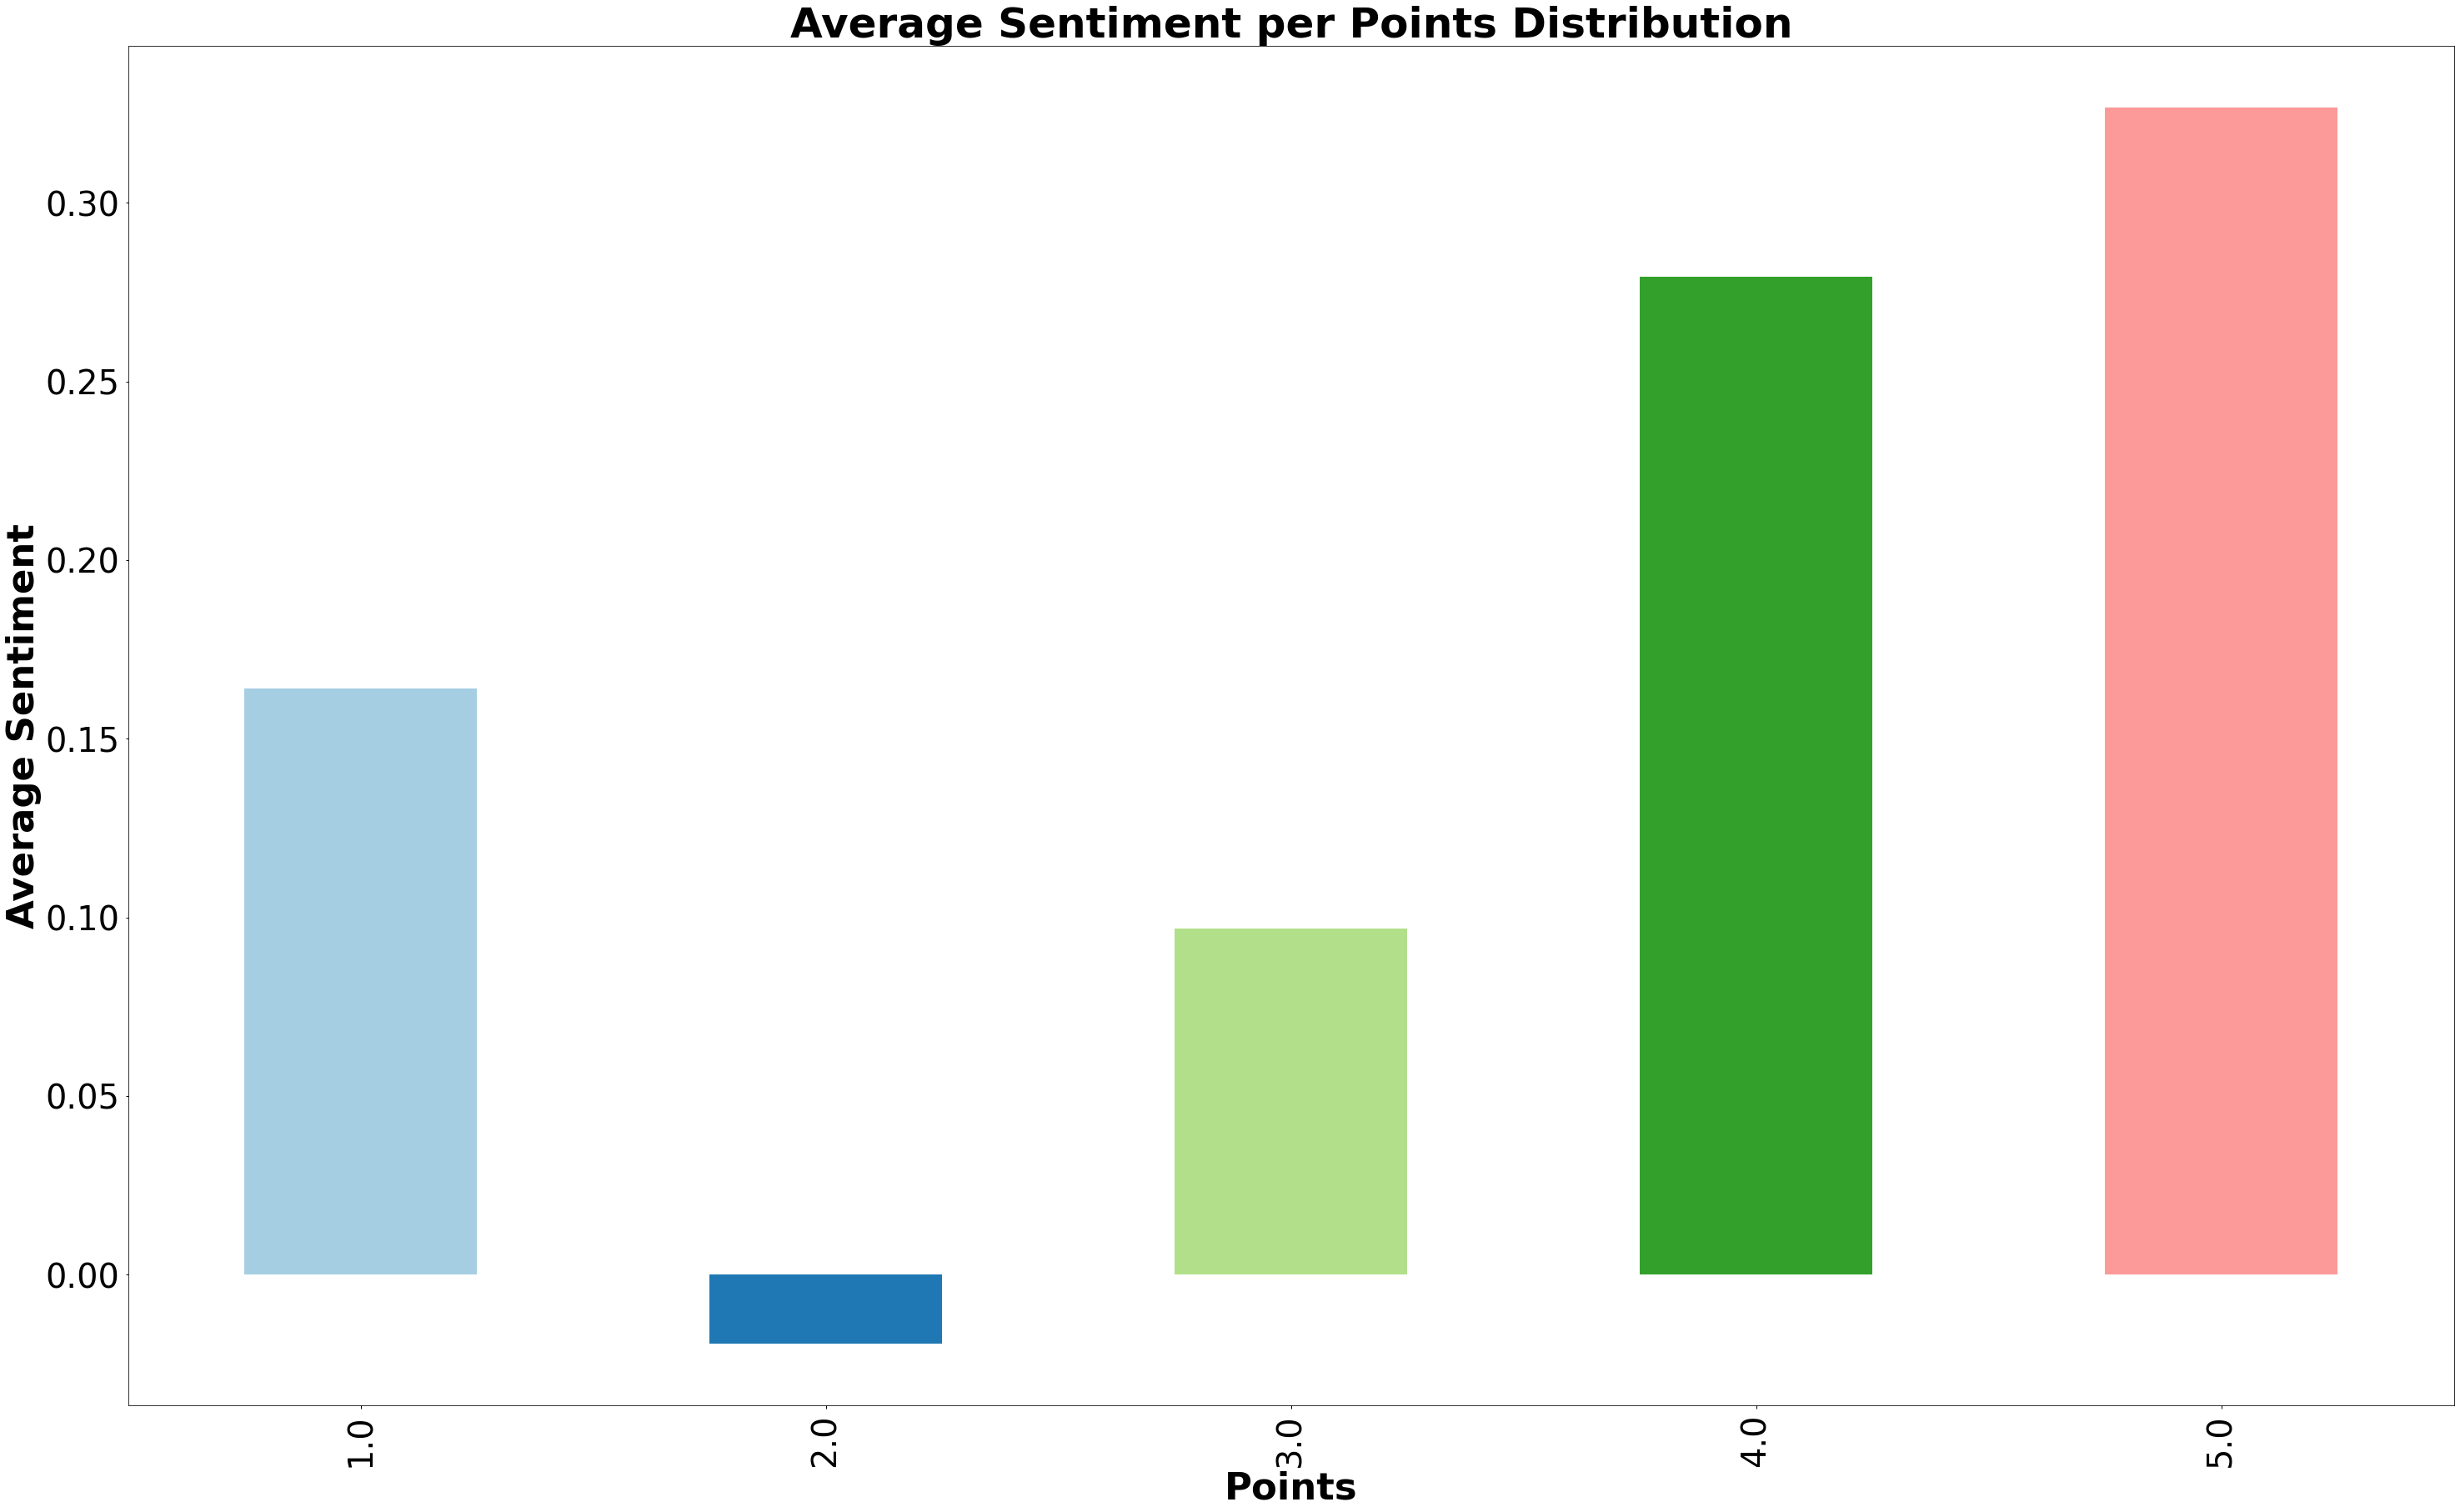

In [64]:
col_map = plt.get_cmap('Paired')
polarity_avg = analysis.groupby('points')['sentiment_of_comment'].mean().plot(kind='bar',color=col_map.colors,figsize=(50,30))
plt.xlabel('Points',weight="bold", fontsize=45)
plt.ylabel('Average Sentiment',weight="bold", fontsize=45)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
plt.title('Average Sentiment per Points Distribution',weight="bold", fontsize=50)
plt.show()


In [65]:
# create a new feature for length of the review
analysis['review_len'] = analysis['lemma_str'].astype(str).apply(len)

# create a new feature for count of the review
analysis['word_count'] = analysis['lemmatized'].apply(lambda x: len(str(x).split()))

analysis

,sentiment,points,lemmatized,lemma_str,sentiment_of_comment,review_len,word_count
0,Positive,4.0,"[buy, sale, thank, much]",buy sale thank much,0.200000,19,4
1,Positive,4.0,"[bought, satisfied, buy, house, village, nice, quality, digital, satisfy, cargo, work, cock, log...",bought satisfied buy house village nice quality digital satisfy cargo work cock logistics compan...,0.366667,157,22
2,Positive,4.0,"[useful, cool, wonderfully, sapasaglam, come, installed]",useful cool wonderfully sapasaglam come installed,0.550000,49,6
3,Positive,4.0,"[good, price, product]",good price product,0.700000,18,3
4,Positive,4.0,"[product, arrive, ok, thank]",product arrive ok thank,0.500000,23,4
...,...,...,...,...,...,...,...
3649,Positive,5.0,"[packaging, good, cargo, also, arrive, time, start, use, product, hope, cool, also, successful]",packaging good cargo also arrive time start use product hope cool also successful,0.600000,81,13
3650,Positive,5.0,"[cool, extremely, successful, package, well, get, u, without, problem]",cool extremely successful package well get u without problem,0.550000,60,9
3651,Positive,4.0,"[highly, recommend]",highly recommend,0.160000,16,2
3652,Positive,4.0,"[high, price, poor, quality, compare, counterpart, product, come, scratch, back, also, strange, ...",high price poor quality compare counterpart product come scratch back also strange move tubular ...,-0.030676,282,44


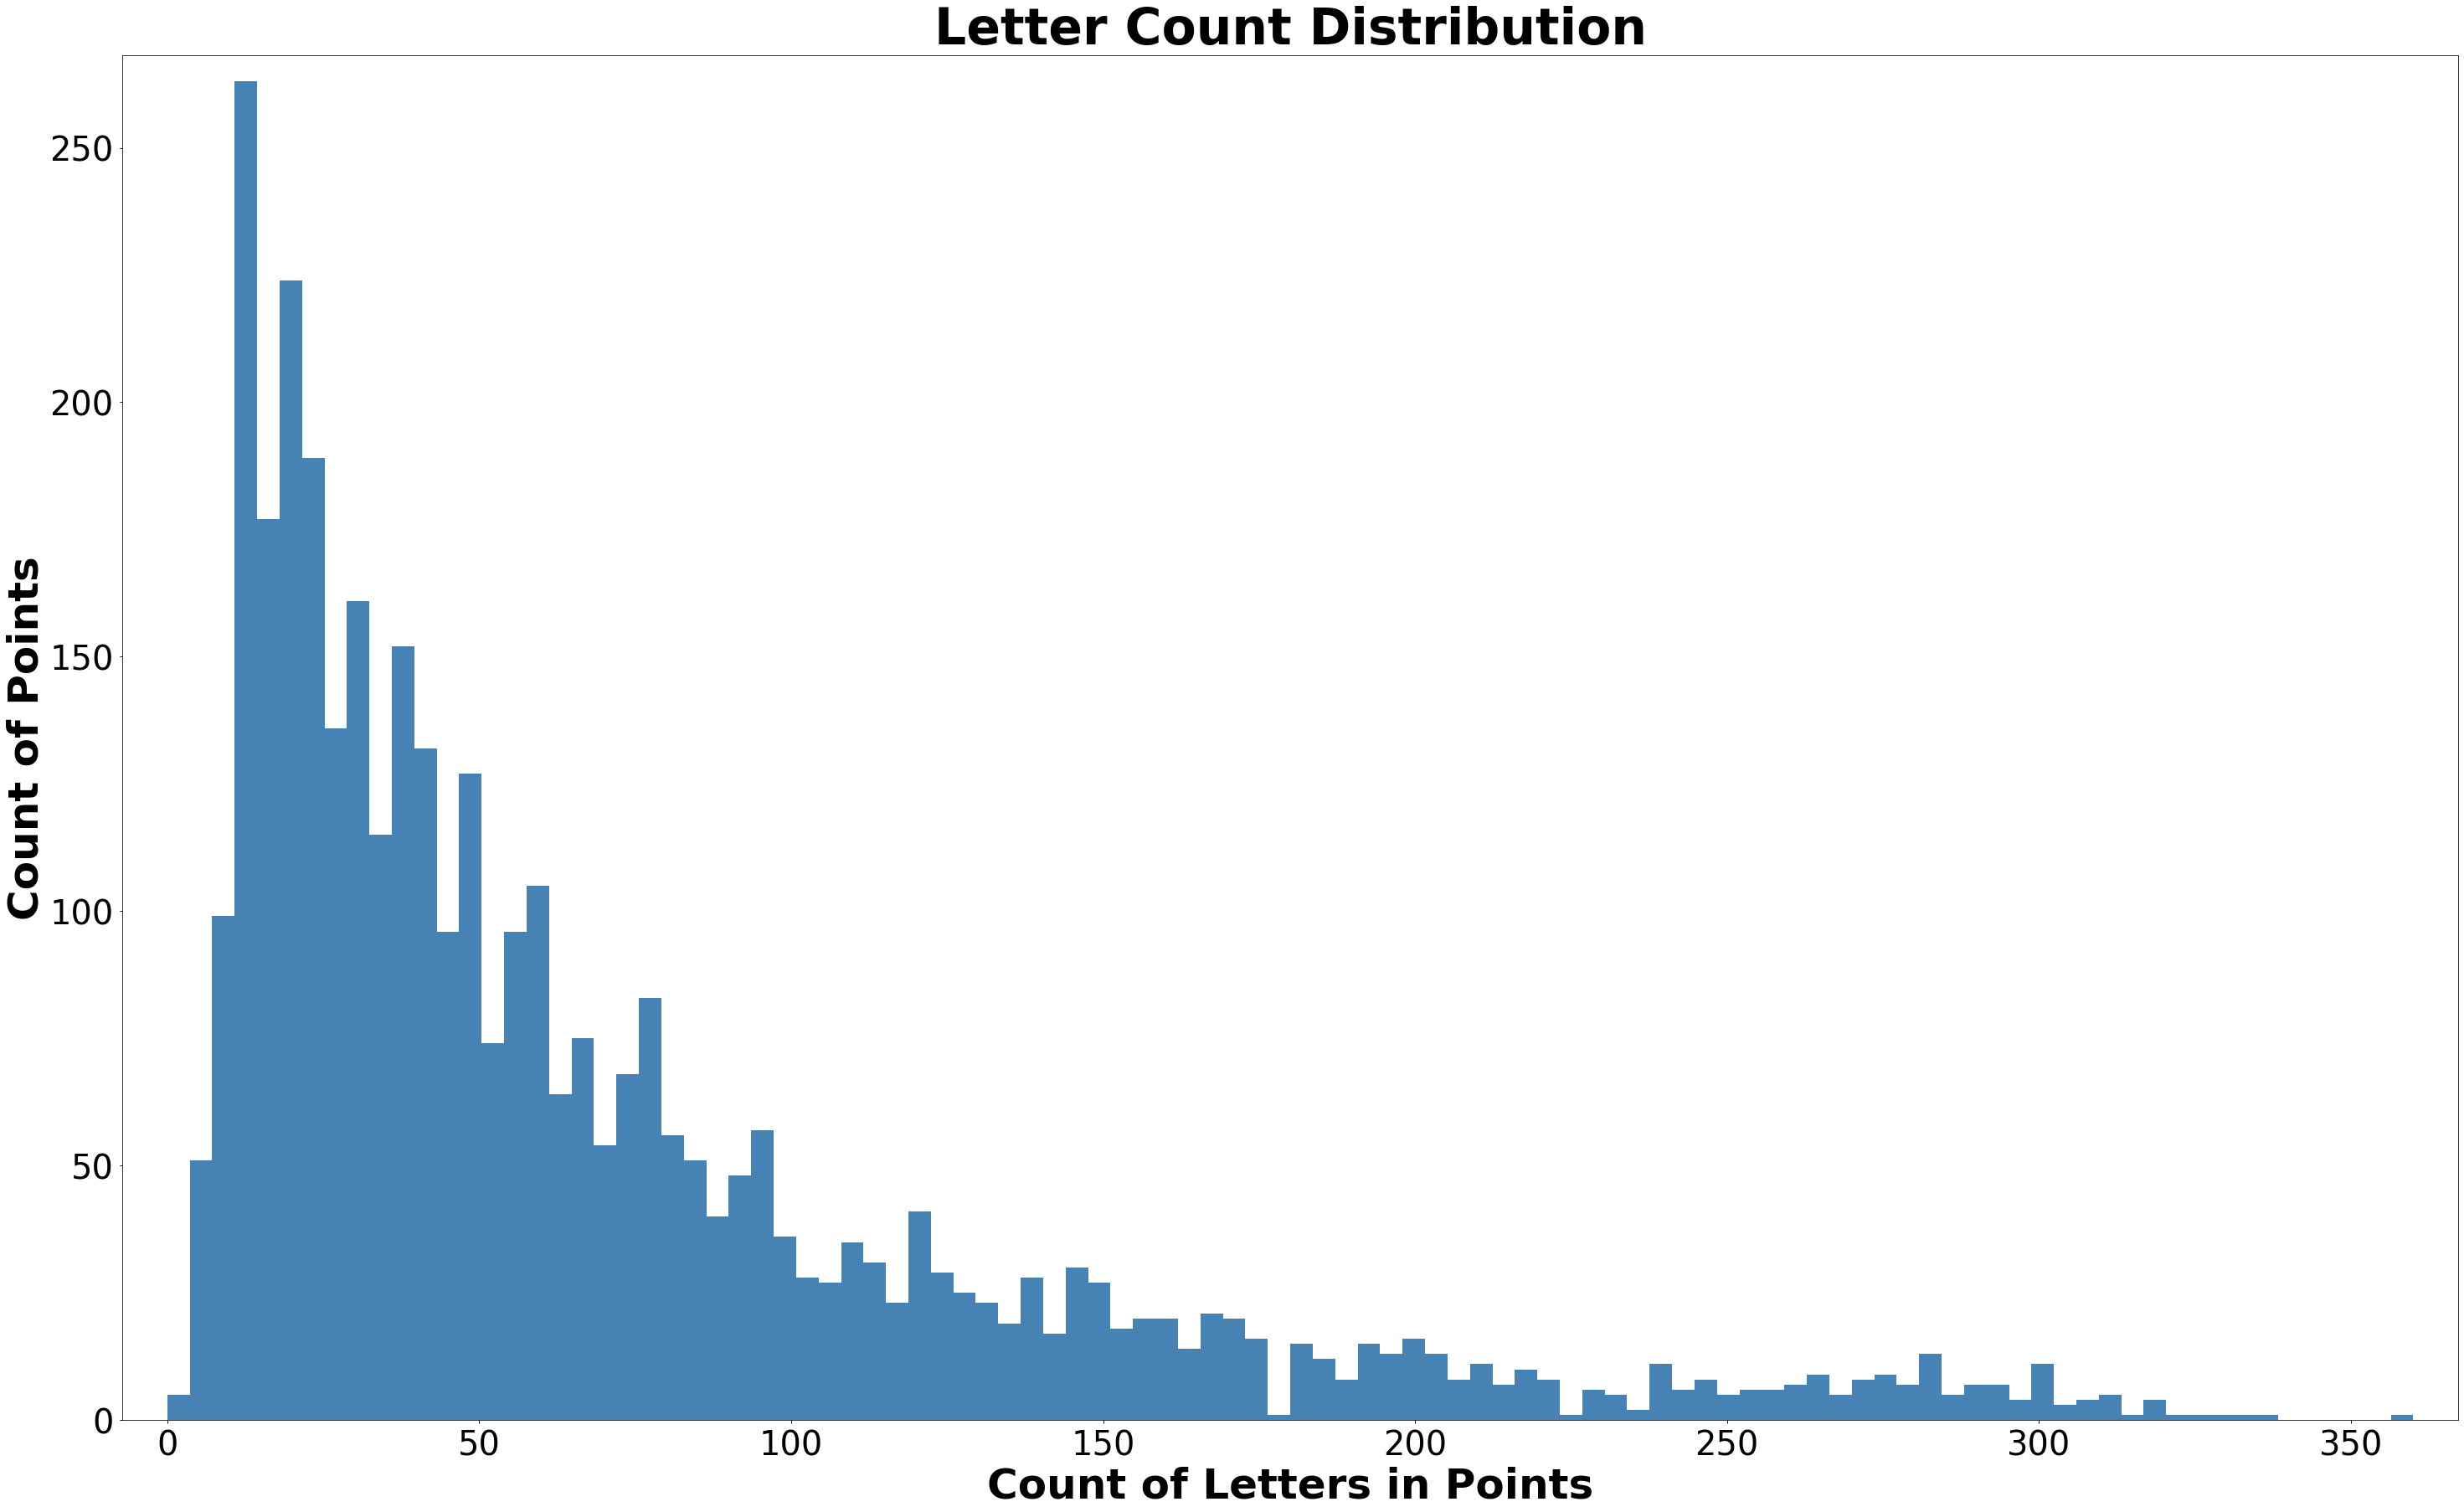

In [66]:
plt.figure(figsize=(50,30))
plt.margins(0.02)
plt.xlabel('Count of Letters in Points', weight="bold",fontsize=50)
plt.xticks(fontsize=40)
plt.ylabel('Count of Points', weight="bold",fontsize=50)
plt.yticks(fontsize=40)
plt.hist(analysis['review_len'], bins=100,color="steelblue")
plt.title('Letter Count Distribution',weight="bold", fontsize=60)
plt.show()

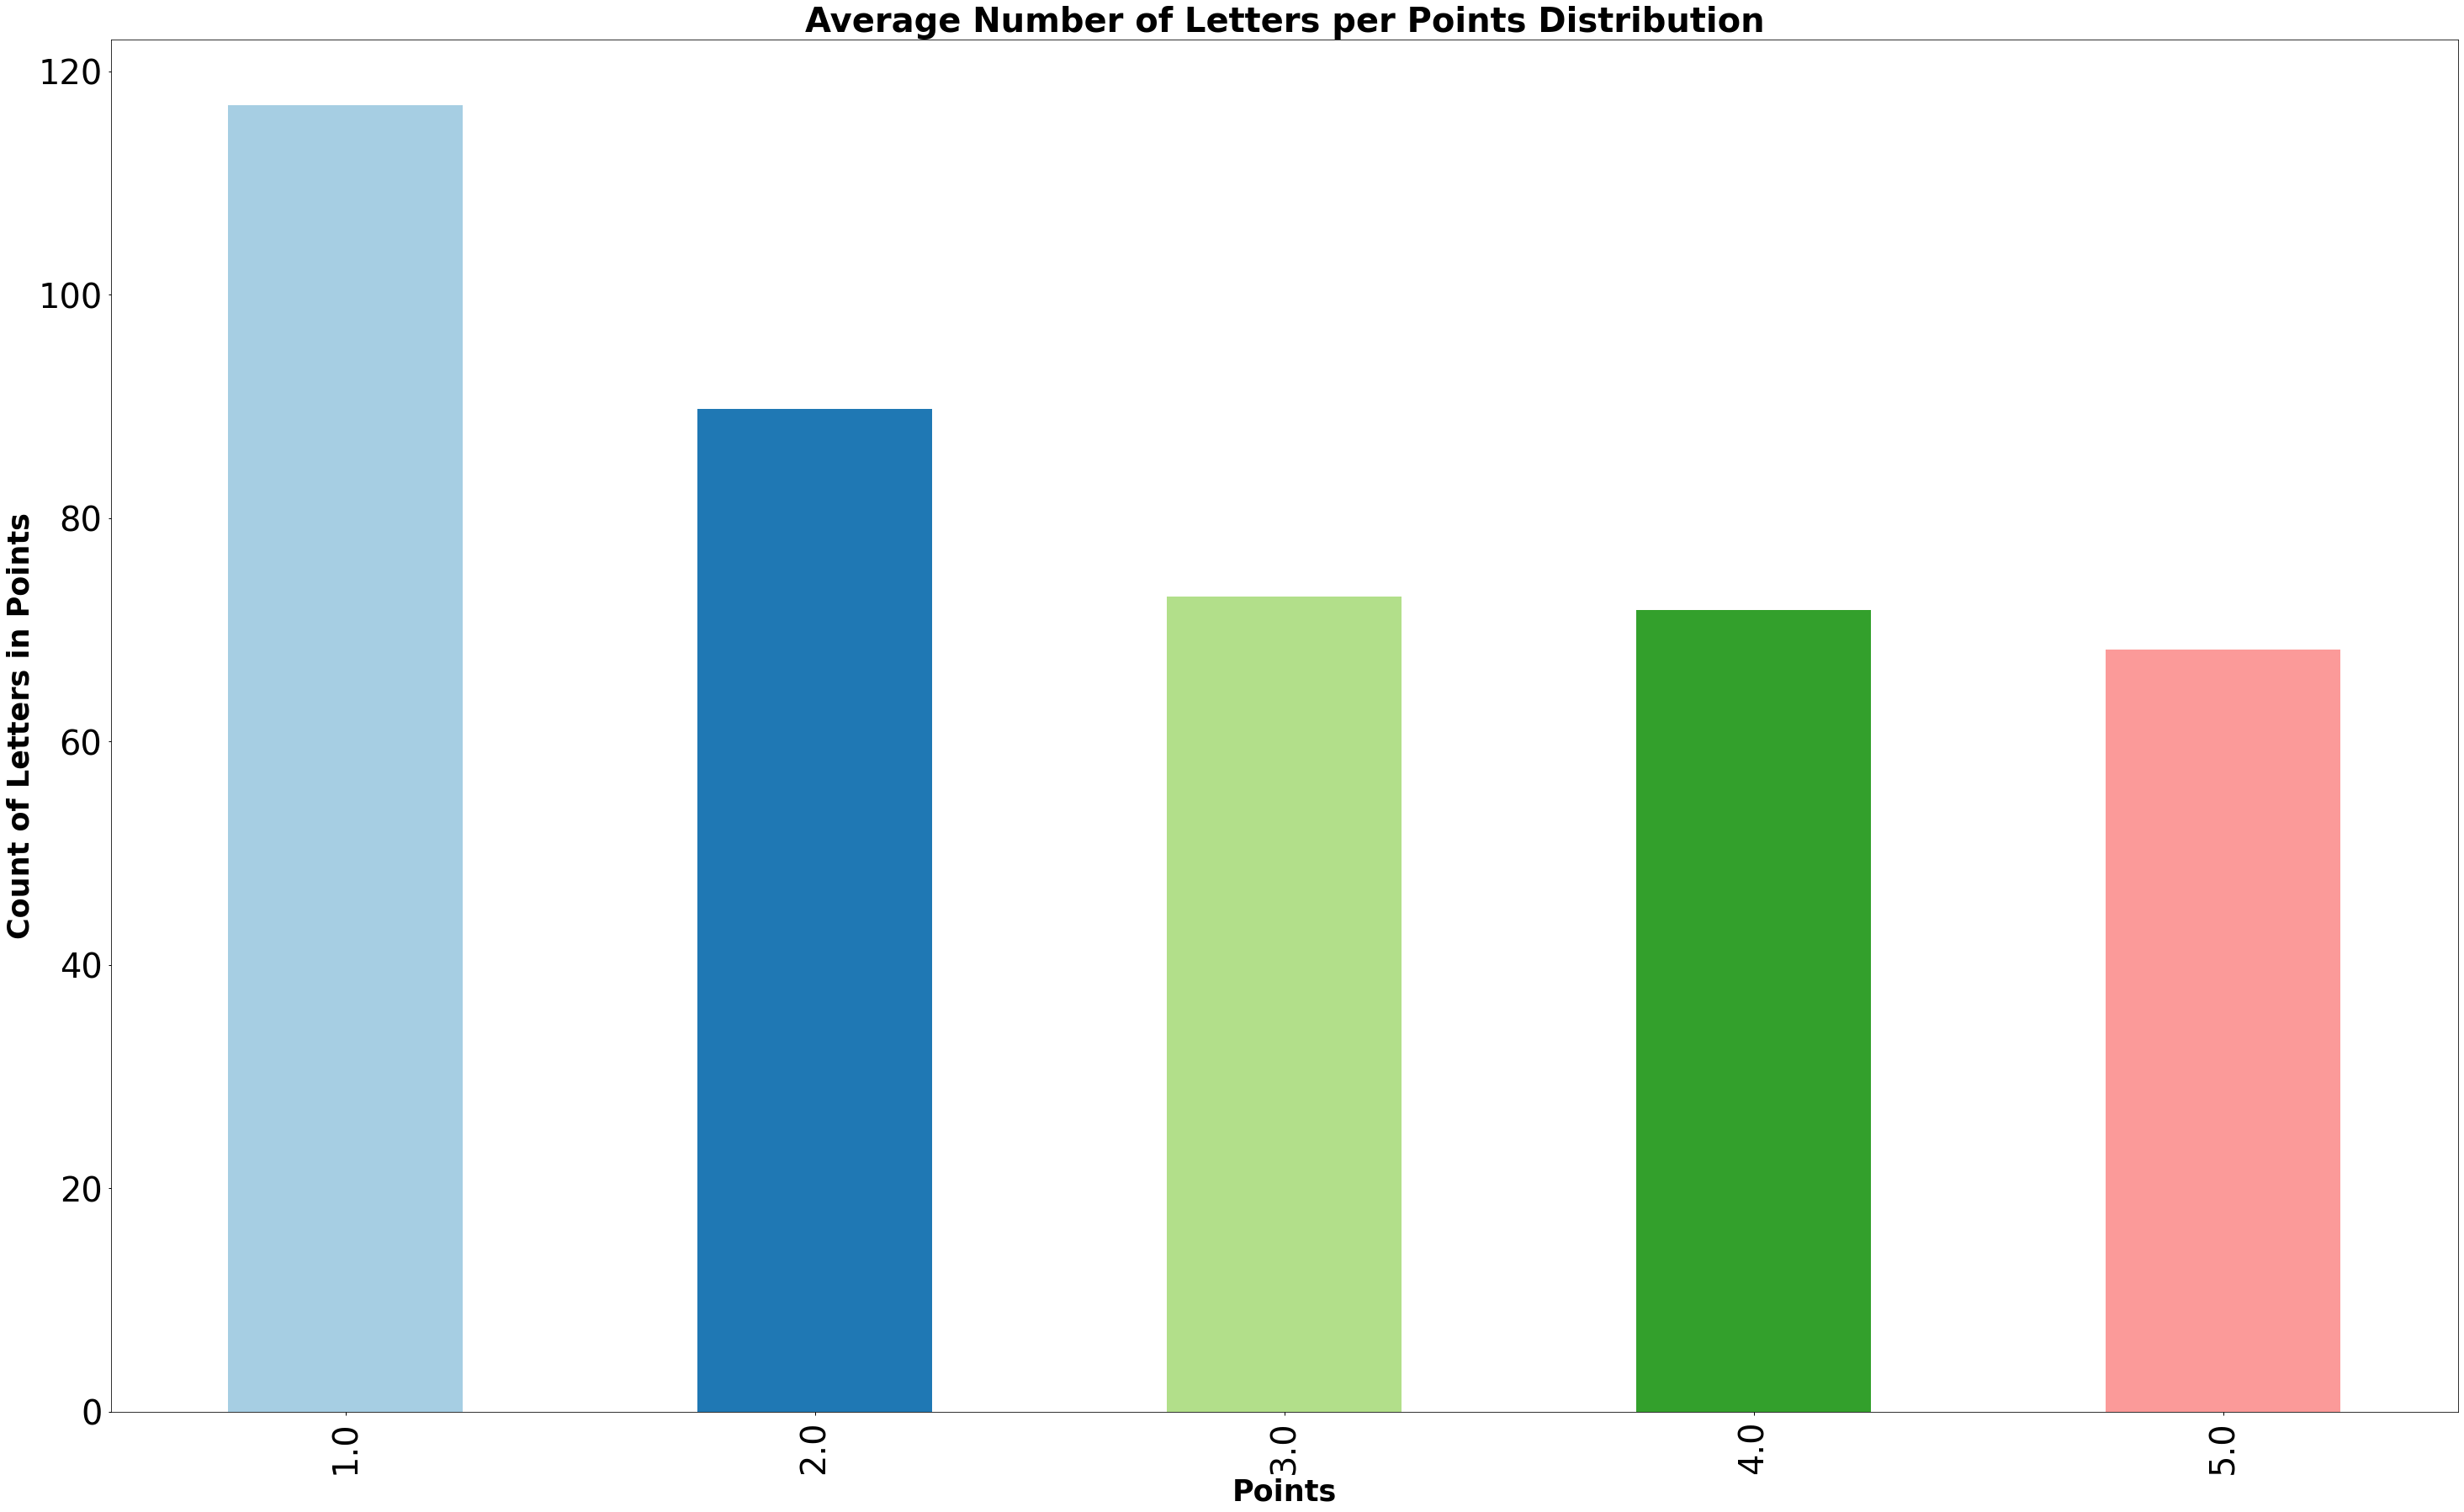

In [67]:
col_map = plt.get_cmap('Paired')
letter_avg = analysis.groupby('points')['review_len'].mean().plot(kind='bar',color=col_map.colors, figsize=(50,30))
plt.xlabel('Points', weight="bold",fontsize=35)
plt.ylabel('Count of Letters in Points',weight="bold", fontsize=35)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
plt.title('Average Number of Letters per Points Distribution',weight="bold", fontsize=40)
plt.show()

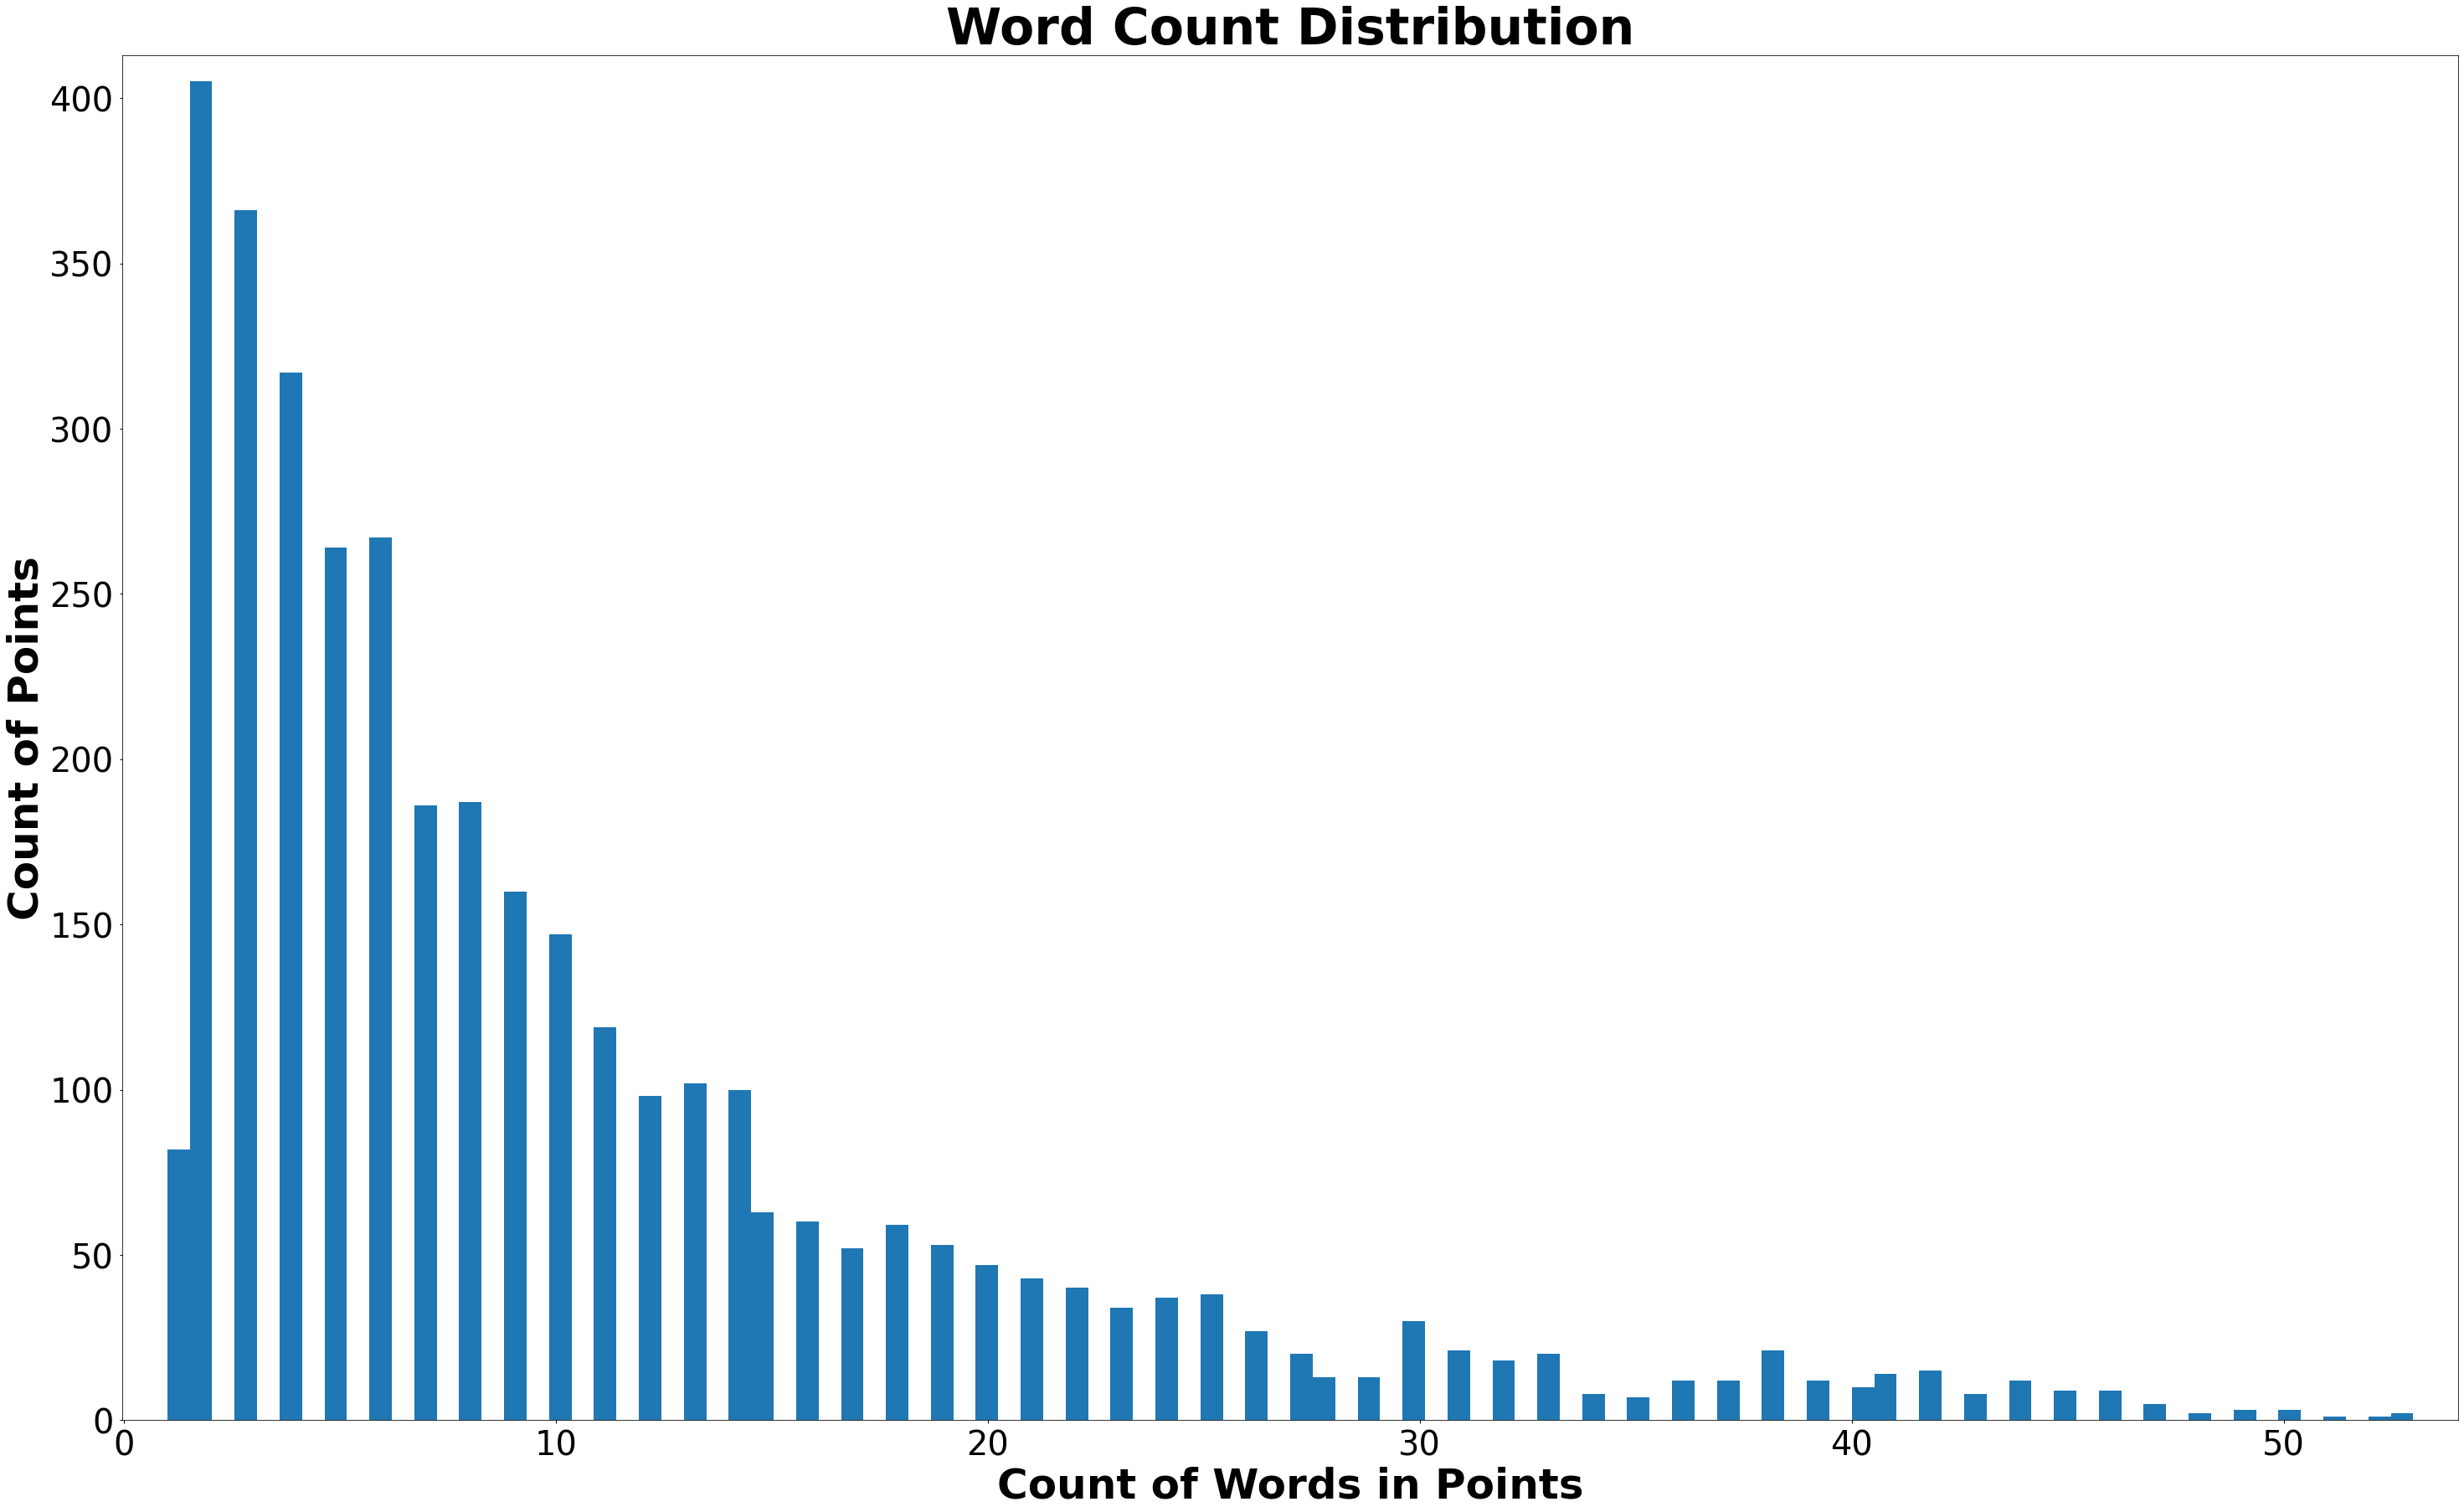

In [68]:
plt.figure(figsize=(50,30))
plt.margins(0.02)
plt.xlabel('Count of Words in Points',weight="bold", fontsize=50)
plt.ylabel('Count of Points',weight="bold", fontsize=50)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
plt.hist(analysis['word_count'], bins=100)
plt.title('Word Count Distribution',weight="bold", fontsize=60)
plt.show()

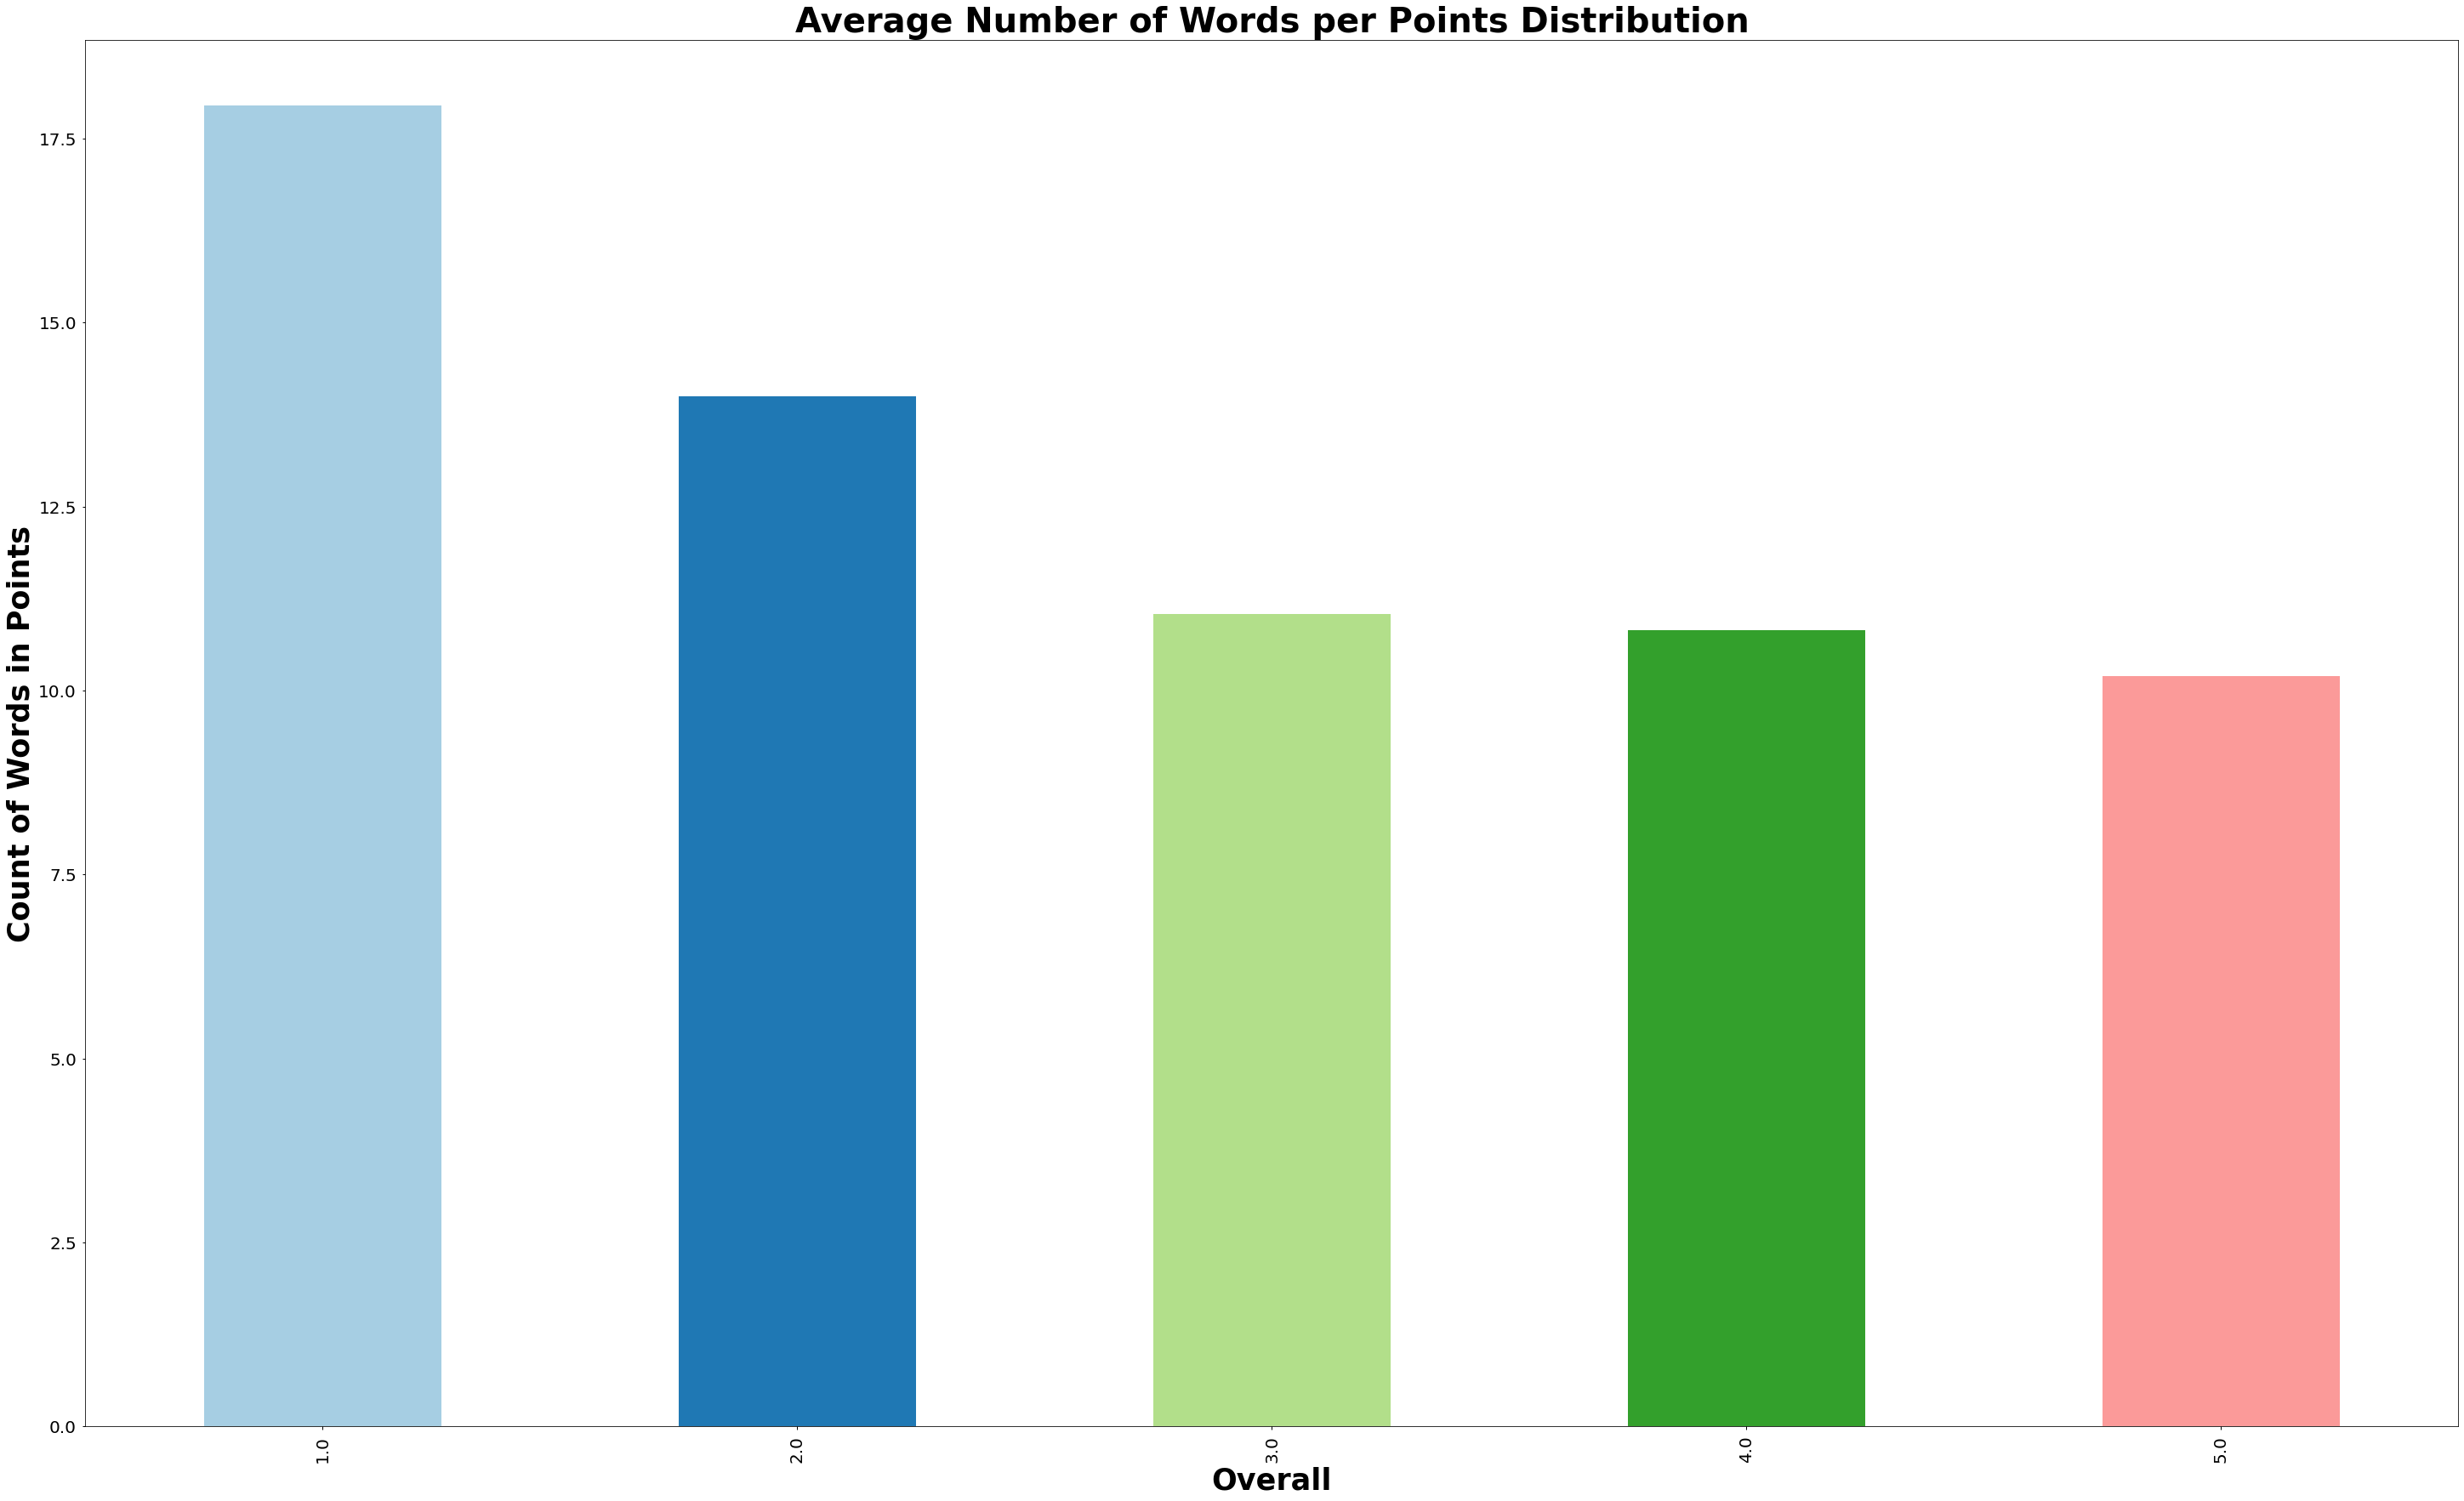

In [69]:
col_map = plt.get_cmap('Paired')
word_avg = analysis.groupby('points')['word_count'].mean().plot(kind='bar',color=col_map.colors,figsize=(50,30))
plt.xlabel('Overall',weight="bold", fontsize=35)
plt.ylabel('Count of Words in Points',weight="bold", fontsize=35)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('Average Number of Words per Points Distribution',weight="bold", fontsize=40)
plt.show()


# **Word Frequencies**

In [70]:
words = analysis['lemmatized']
allwords = []
for wordlist in words:
    allwords += wordlist

In [71]:

mostcommon = FreqDist(allwords).most_common(100)


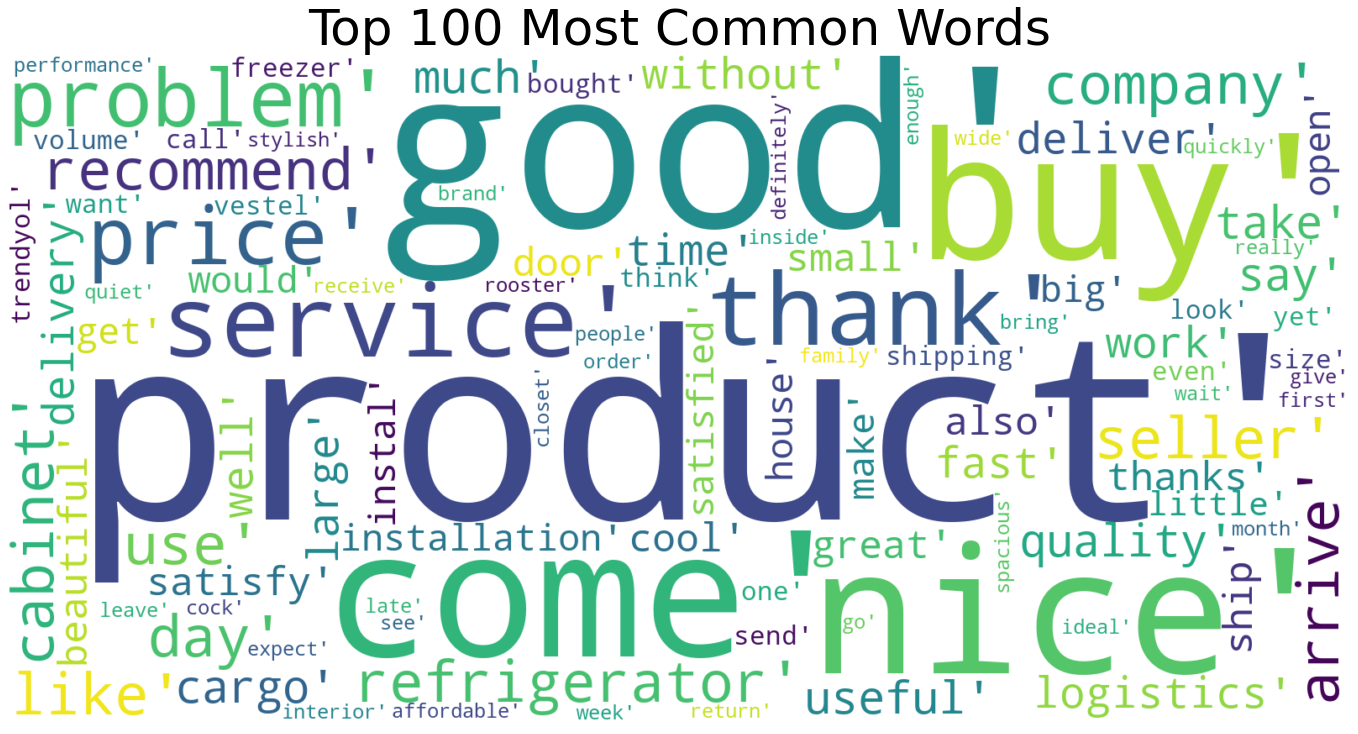

In [72]:
wordcloud = WordCloud(width=1600, height=800, background_color='white').generate(str(mostcommon))
fig = plt.figure(figsize=(30,10), facecolor='white')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Top 100 Most Common Words', fontsize=50,c="black")

plt.tight_layout(pad=0)
plt.show()

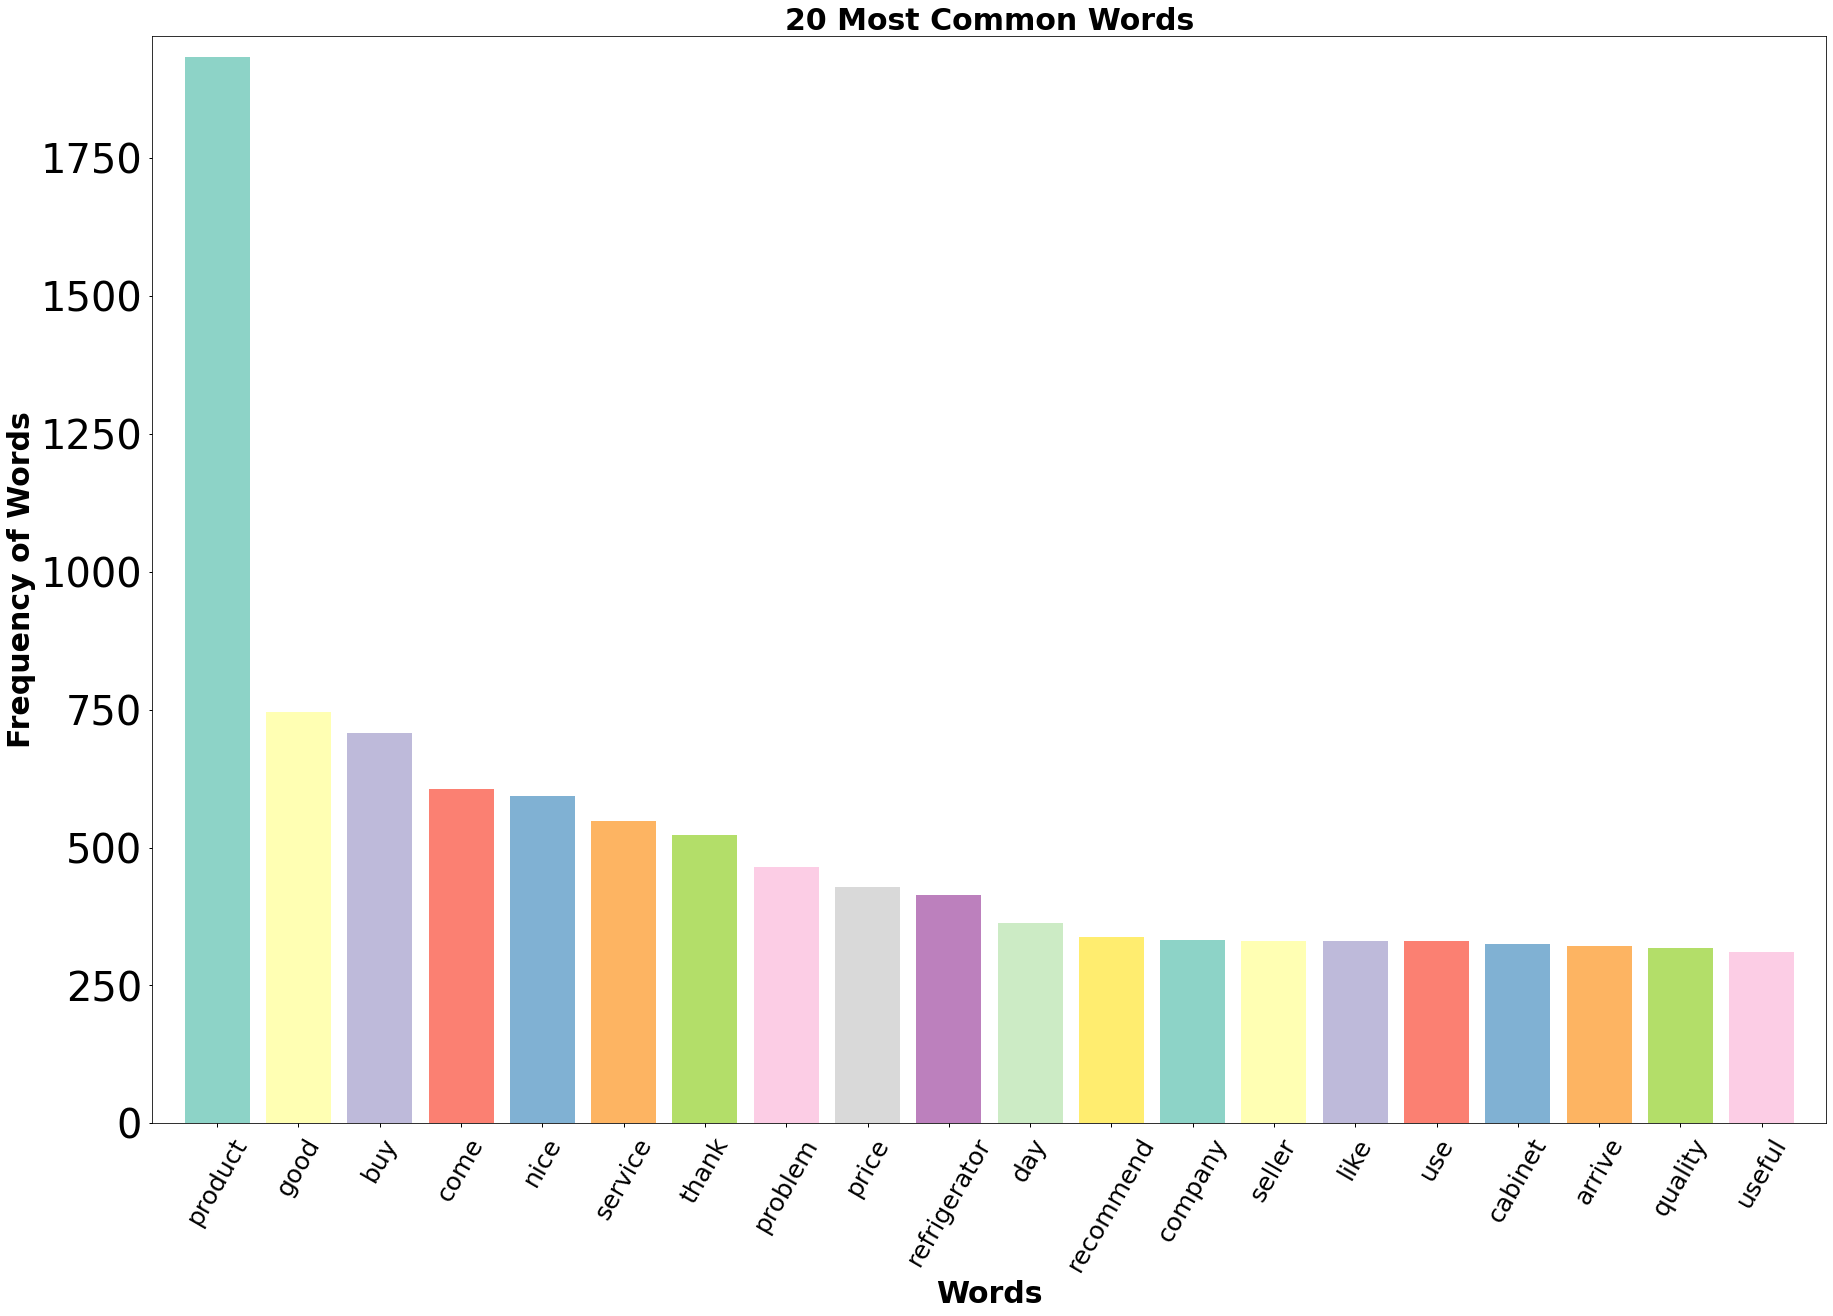

In [73]:
mostcommon_small = (nltk.FreqDist(allwords)).most_common(20)
x, y = zip(*mostcommon_small)
# create a figure
plt.figure(figsize=(30,20))
col_map = plt.get_cmap('Set3')

plt.margins(0.02)
plt.bar(x, y,color=col_map.colors)
plt.xlabel('Words',weight="bold", fontsize=30)
plt.ylabel('Frequency of Words',weight="bold", fontsize=30)
plt.yticks(fontsize=40)
plt.xticks(rotation=60, fontsize=25)
plt.title('20 Most Common Words',weight="bold", fontsize=30)
plt.show()

In [74]:
group_by = analysis.groupby('sentiment')['lemma_str'].apply(lambda x: Counter(' '.join(x).split()).most_common(10))
group_by

sentiment
Negative    [(product, 28), (come, 13), (refrigerator, 11), (company, 10), (buy, 9), (cargo, 8), (arrive, 7)...
Neutral     [(product, 104), (come, 44), (buy, 33), (company, 24), (good, 19), (cargo, 19), (say, 19), (smal...
Positive    [(product, 1801), (good, 722), (buy, 665), (nice, 576), (come, 550), (service, 522), (thank, 514...
Name: lemma_str, dtype: object

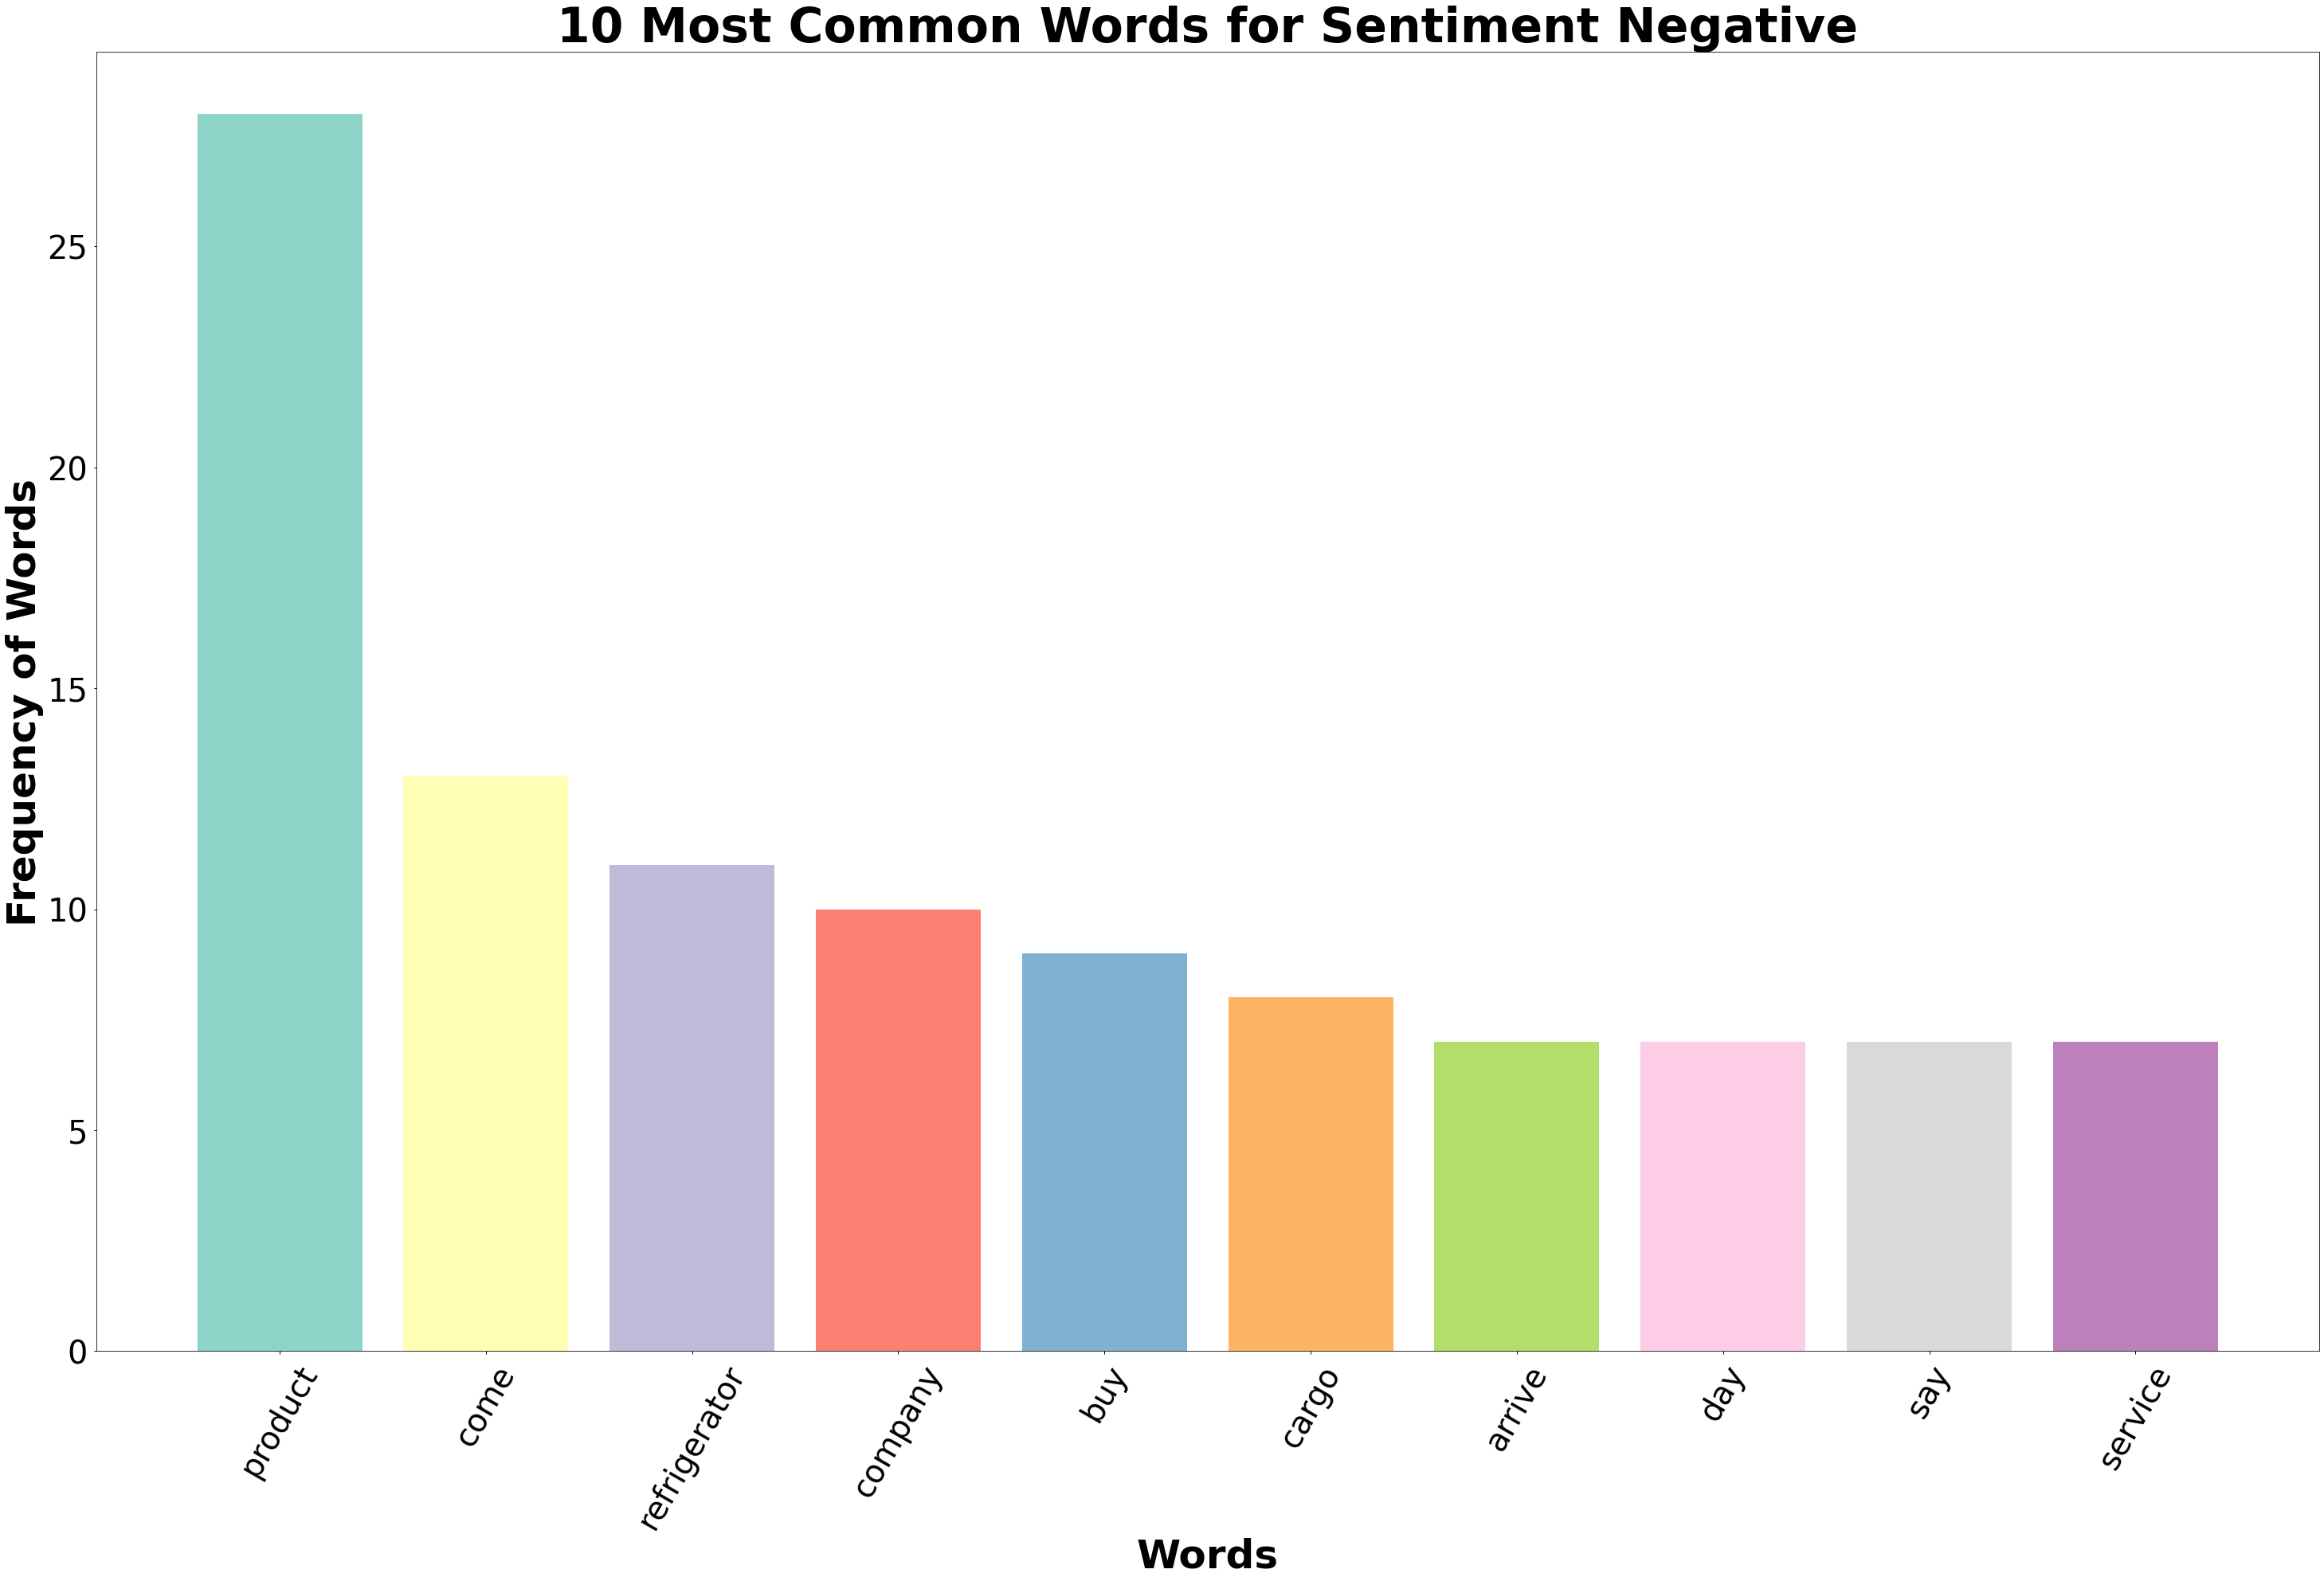

In [75]:
group_by_0 = group_by.iloc[0]
words0 = list(zip(*group_by_0))[0]
freq0 = list(zip(*group_by_0))[1]
col_map = plt.get_cmap('Set3')

plt.figure(figsize=(50,30))
plt.bar(words0, freq0,color=col_map.colors)
plt.xlabel('Words',weight="bold", fontsize=50)
plt.ylabel('Frequency of Words',weight="bold", fontsize=50)
plt.yticks(fontsize=40)
plt.xticks(rotation=60, fontsize=40)
plt.title('10 Most Common Words for Sentiment Negative',weight="bold", fontsize=60)
plt.show()

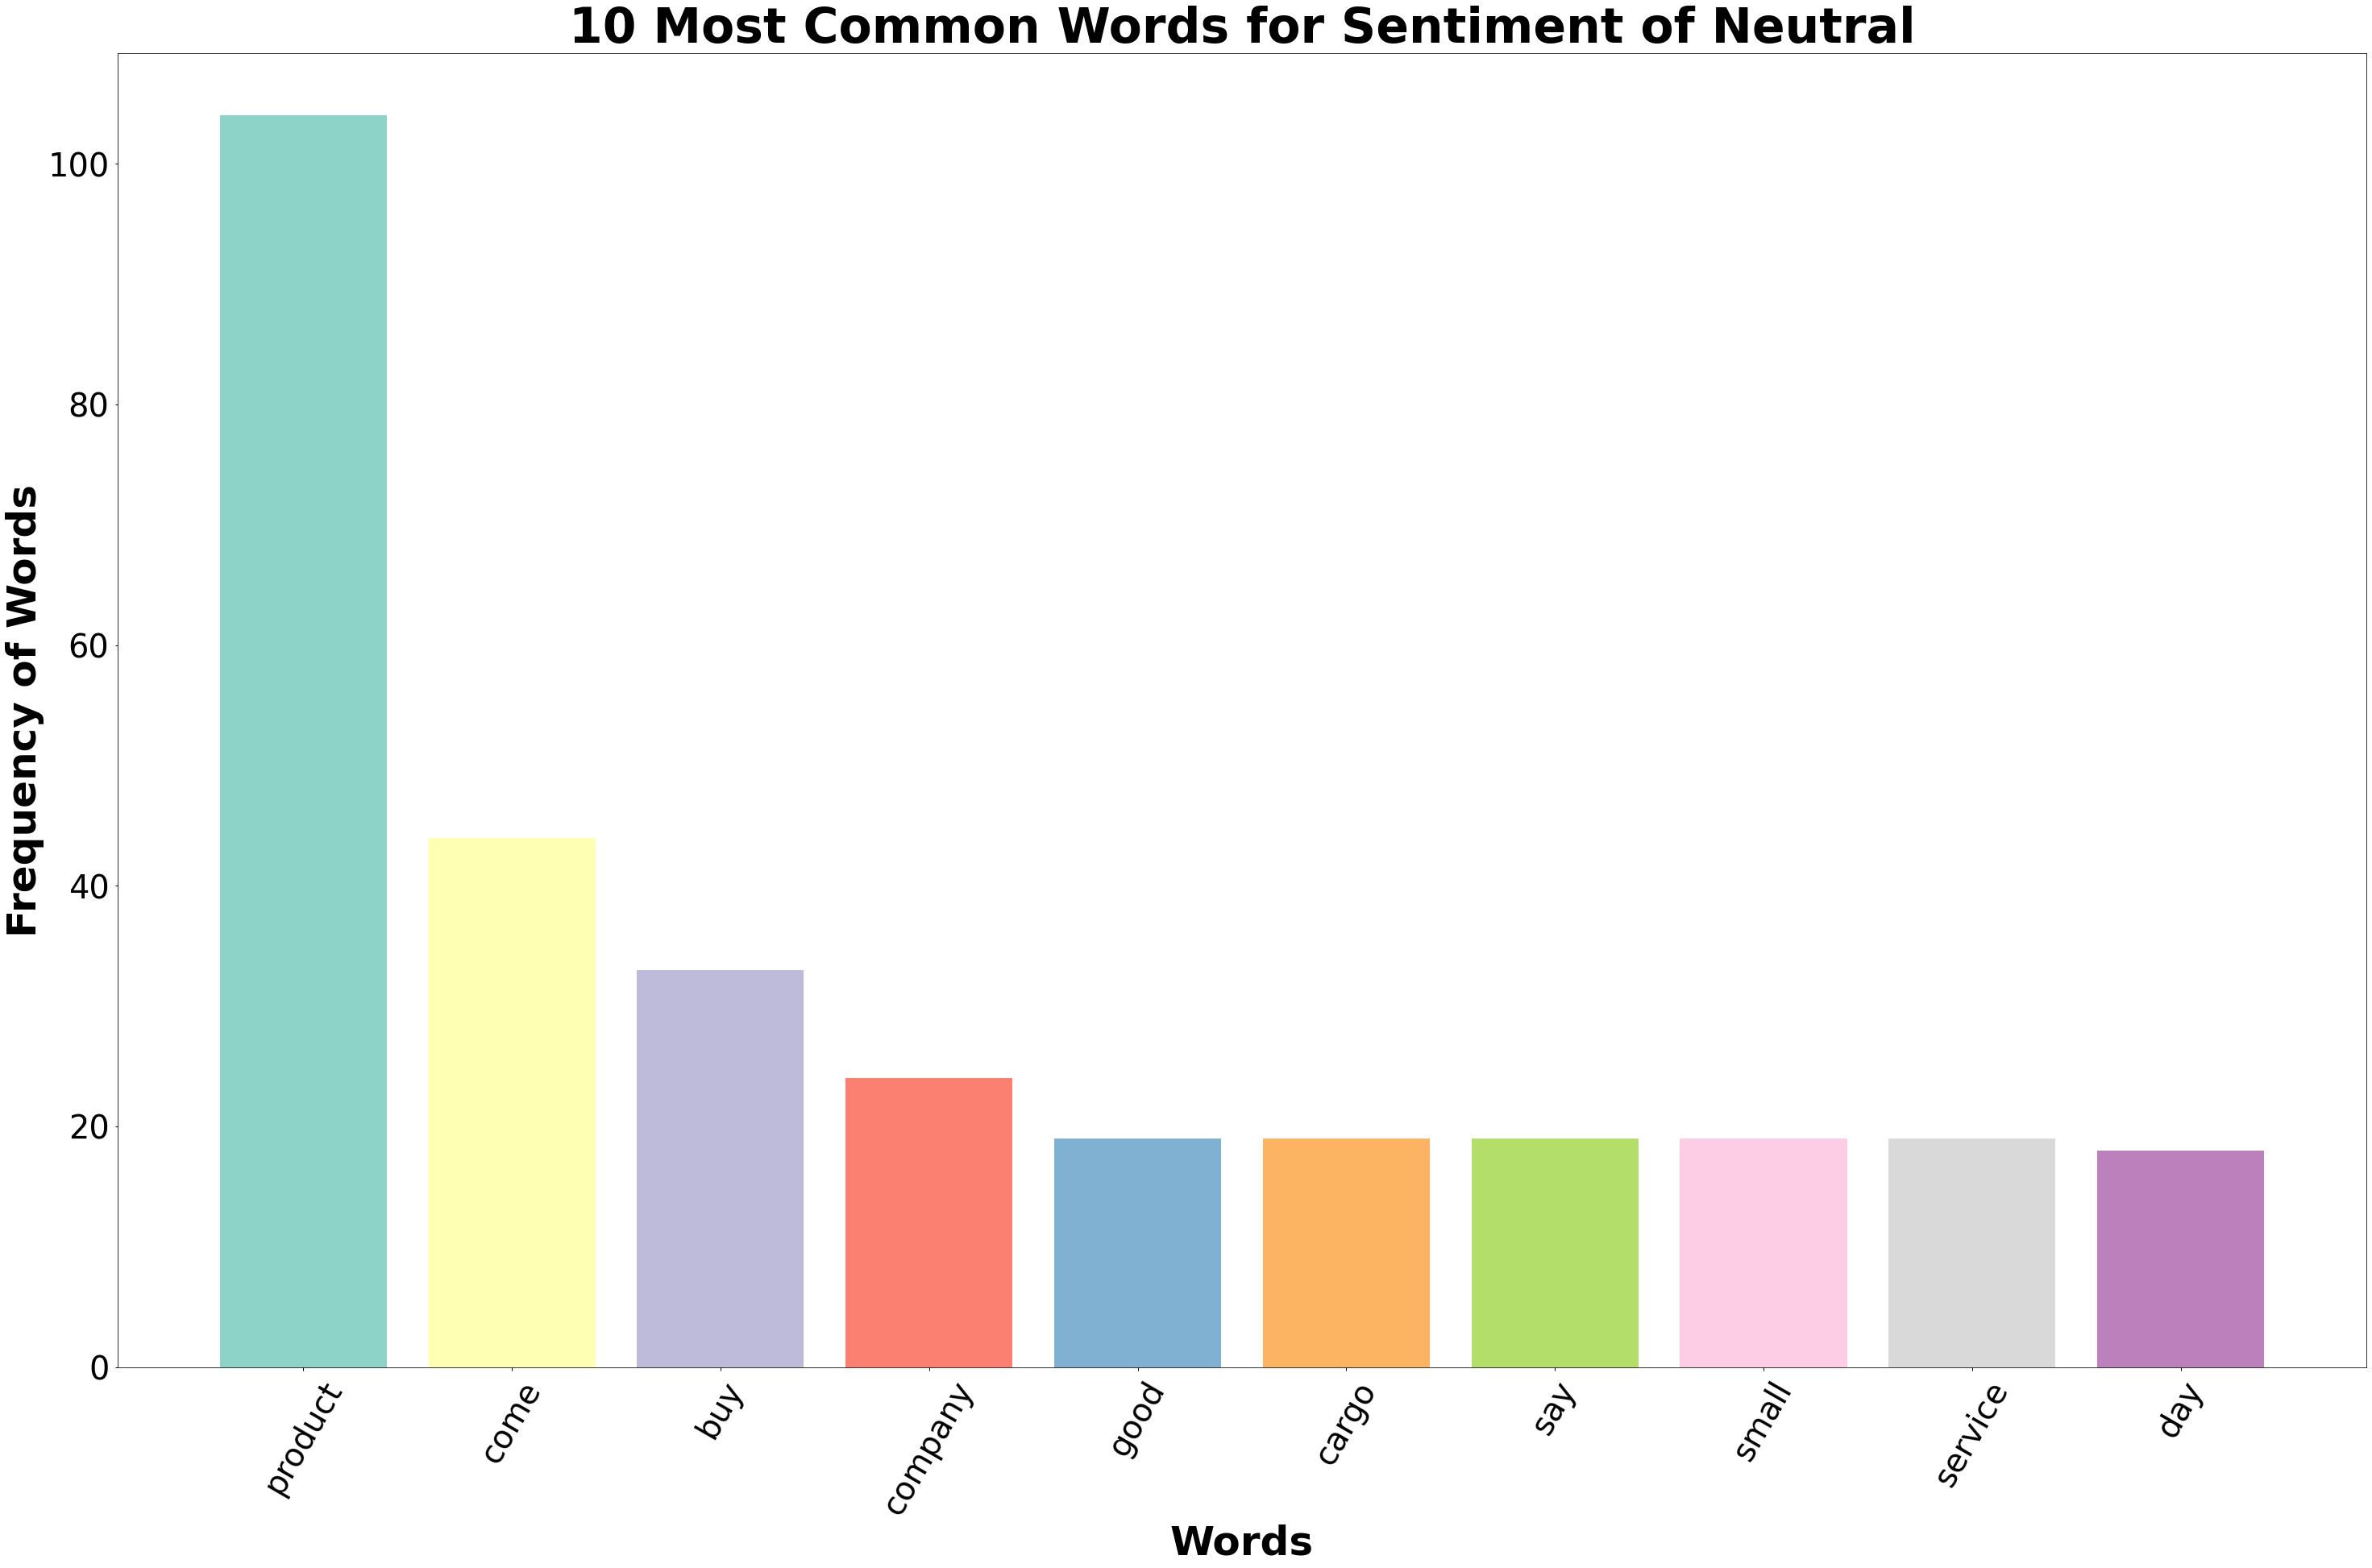

In [76]:
group_by_1 = group_by.iloc[1]
words1 = list(zip(*group_by_1))[0]
freq1 = list(zip(*group_by_1))[1]
plt.figure(figsize=(50,30))
col_map = plt.get_cmap('Set3')

plt.bar(words1, freq1,color=col_map.colors)
plt.xlabel('Words', weight="bold",fontsize=50)
plt.ylabel('Frequency of Words', weight="bold",fontsize=50)
plt.yticks(fontsize=40)
plt.xticks(rotation=60, fontsize=40)
plt.title('10 Most Common Words for Sentiment of Neutral',weight="bold", fontsize=60)
plt.show()

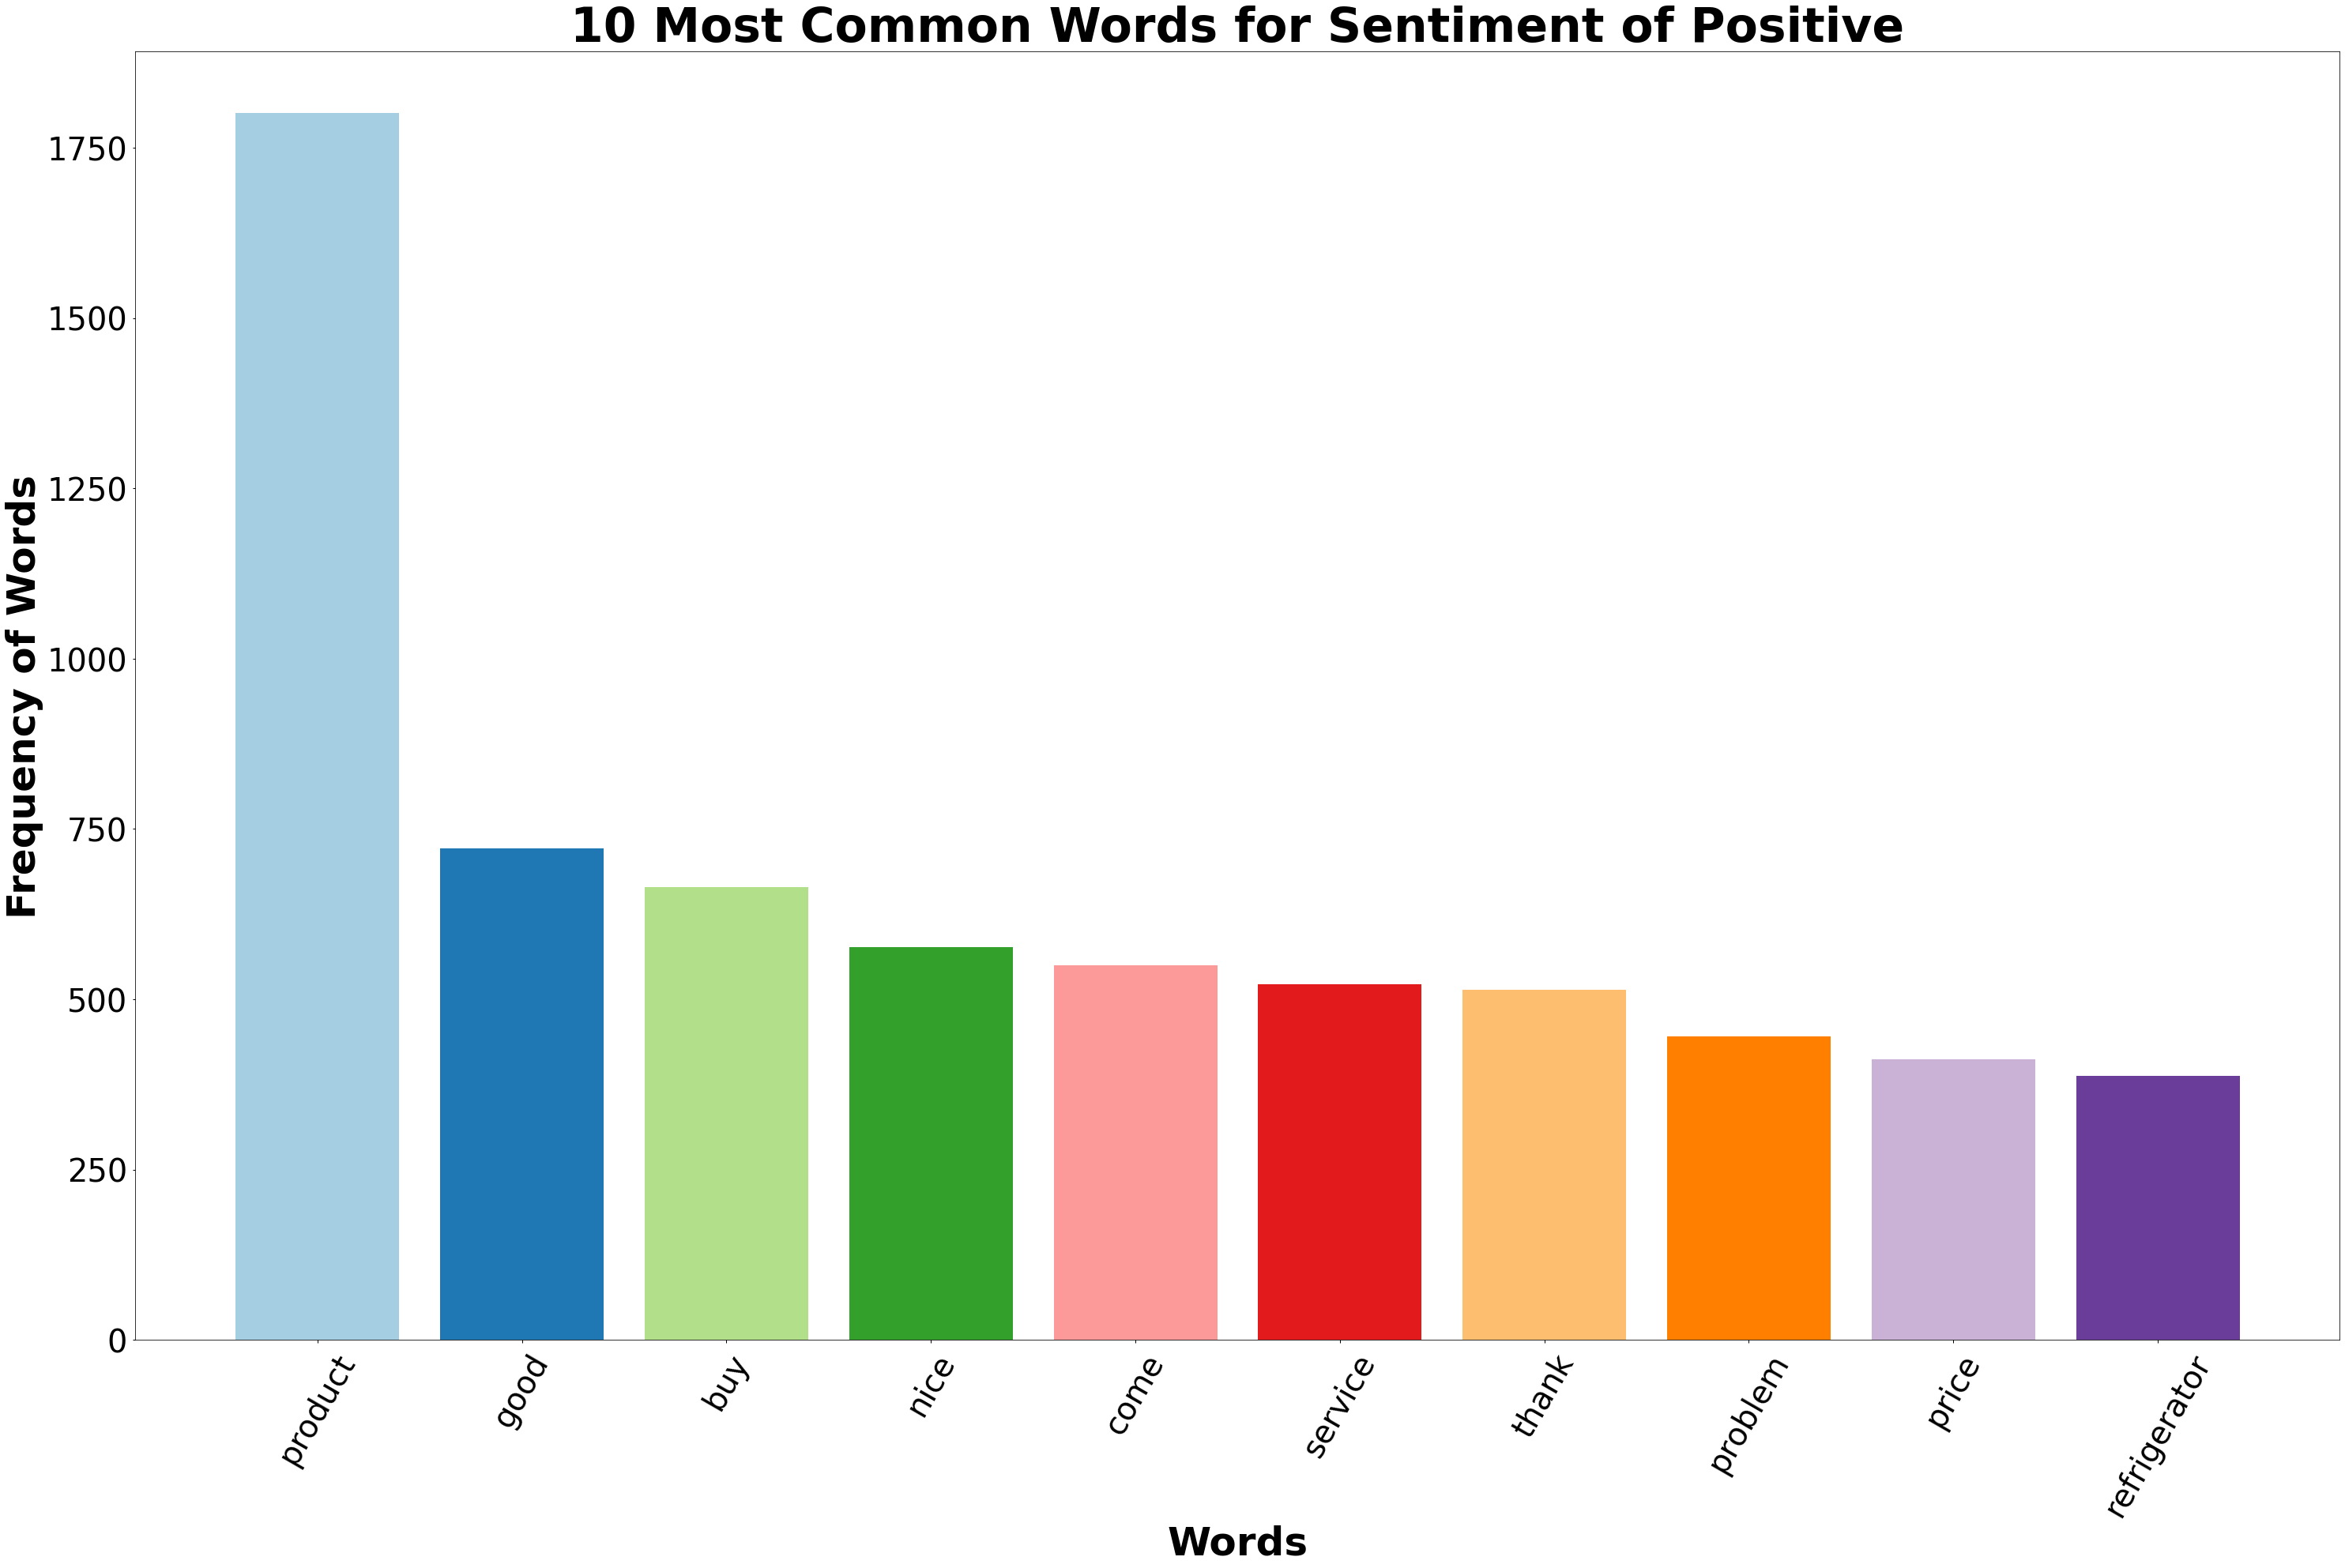

In [77]:
group_by_2 = group_by.iloc[2]
words2 = list(zip(*group_by_2))[0]
freq2 = list(zip(*group_by_2))[1]
plt.figure(figsize=(50,30))
col_map = plt.get_cmap('Paired')

plt.bar(words2, freq2,color=col_map.colors)
plt.xlabel('Words',weight="bold", fontsize=50)
plt.ylabel('Frequency of Words', weight="bold",fontsize=50)
plt.yticks(fontsize=40)
plt.xticks(rotation=60, fontsize=40)
plt.title('10 Most Common Words for Sentiment of Positive',weight="bold", fontsize=60)
plt.show()

In [78]:
analysis.head(5)


,sentiment,points,lemmatized,lemma_str,sentiment_of_comment,review_len,word_count
0,Positive,4.0,"[buy, sale, thank, much]",buy sale thank much,0.200000,19,4
1,Positive,4.0,"[bought, satisfied, buy, house, village, nice, quality, digital, satisfy, cargo, work, cock, log...",bought satisfied buy house village nice quality digital satisfy cargo work cock logistics compan...,0.366667,157,22
2,Positive,4.0,"[useful, cool, wonderfully, sapasaglam, come, installed]",useful cool wonderfully sapasaglam come installed,0.550000,49,6
3,Positive,4.0,"[good, price, product]",good price product,0.700000,18,3
4,Positive,4.0,"[product, arrive, ok, thank]",product arrive ok thank,0.500000,23,4


In [79]:
analysis.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3654 entries, 0 to 3653
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   sentiment             3654 non-null   object 
 1   points                3654 non-null   float64
 2   lemmatized            3654 non-null   object 
 3   lemma_str             3654 non-null   object 
 4   sentiment_of_comment  3654 non-null   float64
 5   review_len            3654 non-null   int64  
 6   word_count            3654 non-null   int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 200.0+ KB


# **Topic Modelling**


In [80]:
# you have to feed strings into a countvec
# max_df=0.9 we will remove words which appear in more than 90% of the reviews
# min_df=25 we will remove words which appear in less than 25 reviews

# Creating the vectorizer object
tf_vectorizer = CountVectorizer(max_df=0.9, min_df=25, max_features=5000)

# apply the transformation to create the document term matrix
tf = tf_vectorizer.fit_transform(analysis['lemma_str'].values.astype('U'))
tf_feature_names = tf_vectorizer.get_feature_names()

tf


<3654x277 sparse matrix of type '<class 'numpy.int64'>'
	with 27283 stored elements in Compressed Sparse Row format>

In [81]:
doc_term_matrix = pd.DataFrame(tf.toarray(), columns=list(tf_feature_names))
doc_term_matrix

,accord,advise,affordable,already,also,although,apartment,arrive,arrived,ask,...,white,wide,width,within,without,work,would,write,year,yet
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3649,0,0,0,0,2,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3650,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3651,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3652,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [82]:
lda_model = LatentDirichletAllocation(n_components=3, learning_method='online', max_iter=500, random_state=0).fit(tf)


In [83]:
print(lda_model)


LatentDirichletAllocation(learning_method='online', max_iter=500,
                          n_components=3, random_state=0)


In [84]:
#Kümelememiz gereken Konu sayısını
no_top_words = 10

def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i]
                          for i in topic.argsort()[:-no_top_words - 1:-1]]))
              
display_topics(lda_model, tf_feature_names, no_top_words)
#LDA tarafından keşfedilen, her  birindeki konular ve en iyi kelimeler alacağız

Topic 0:
buy useful nice refrigerator cabinet well large work cool use
Topic 1:
product good thank recommend nice price much quality fast thanks
Topic 2:
product come problem service day company buy say cargo take


In [85]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df =25, max_features=5000, use_idf=True)

tfidf = tfidf_vectorizer.fit_transform(analysis['lemma_str'])
tfidf_feature_names = tfidf_vectorizer.get_feature_names()

In [86]:
doc_term_matrix_tfidf = pd.DataFrame(tfidf.toarray(), columns=list(tfidf_feature_names))
doc_term_matrix_tfidf

,accord,advise,affordable,already,also,although,apartment,arrive,arrived,ask,...,white,wide,width,within,without,work,would,write,year,yet
0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.171345,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.703469,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3649,0.0,0.0,0.0,0.0,0.519050,0.0,0.0,0.216422,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
3650,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.293331,0.000000,0.0,0.0,0.0,0.0
3651,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
3652,0.0,0.0,0.0,0.0,0.190352,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.169629,0.0,0.0,0.0,0.0


In [87]:
#obtain a NMF model.
nmf = NMF(n_components=3, random_state=0, alpha=.1, init='nndsvd').fit(tfidf)
#fit the model
display_topics(nmf, tfidf_feature_names, no_top_words) 

Topic 0:
good product price quality recommend performance affordable pretty satisfy bought
Topic 1:
nice product useful satisfy fridge like recommend wide quality big
Topic 2:
product thank come buy problem service arrive much like day


In [88]:
nmf_topic_values = nmf.transform(tfidf)
analysis['nmf_topics'] = nmf_topic_values.argmax(axis=1)
lda_topic_values = lda_model.transform(tf)
analysis['lda_topics'] = lda_topic_values.argmax(axis=1)

In [89]:
analysis


,sentiment,points,lemmatized,lemma_str,sentiment_of_comment,review_len,word_count,nmf_topics,lda_topics
0,Positive,4.0,"[buy, sale, thank, much]",buy sale thank much,0.200000,19,4,2,1
1,Positive,4.0,"[bought, satisfied, buy, house, village, nice, quality, digital, satisfy, cargo, work, cock, log...",bought satisfied buy house village nice quality digital satisfy cargo work cock logistics compan...,0.366667,157,22,2,2
2,Positive,4.0,"[useful, cool, wonderfully, sapasaglam, come, installed]",useful cool wonderfully sapasaglam come installed,0.550000,49,6,2,0
3,Positive,4.0,"[good, price, product]",good price product,0.700000,18,3,0,1
4,Positive,4.0,"[product, arrive, ok, thank]",product arrive ok thank,0.500000,23,4,2,1
...,...,...,...,...,...,...,...,...,...
3649,Positive,5.0,"[packaging, good, cargo, also, arrive, time, start, use, product, hope, cool, also, successful]",packaging good cargo also arrive time start use product hope cool also successful,0.600000,81,13,2,1
3650,Positive,5.0,"[cool, extremely, successful, package, well, get, u, without, problem]",cool extremely successful package well get u without problem,0.550000,60,9,2,0
3651,Positive,4.0,"[highly, recommend]",highly recommend,0.160000,16,2,0,1
3652,Positive,4.0,"[high, price, poor, quality, compare, counterpart, product, come, scratch, back, also, strange, ...",high price poor quality compare counterpart product come scratch back also strange move tubular ...,-0.030676,282,44,2,0


In [90]:
lda_remap = {0: 'Useful and Large Refrigetor', 1: 'Product Good Price', 2: 'Product Company Service'}

analysis['lda_topics'] = analysis['lda_topics'].map(lda_remap)

In [91]:
nmf_remap = {0: 'Affordable Product', 1: 'Quality Big Fridge', 2: 'Product Service'}

analysis['nmf_topics'] = analysis['nmf_topics'].map(nmf_remap)

In [92]:
analysis.head()

,sentiment,points,lemmatized,lemma_str,sentiment_of_comment,review_len,word_count,nmf_topics,lda_topics
0,Positive,4.0,"[buy, sale, thank, much]",buy sale thank much,0.200000,19,4,Product Service,Product Good Price
1,Positive,4.0,"[bought, satisfied, buy, house, village, nice, quality, digital, satisfy, cargo, work, cock, log...",bought satisfied buy house village nice quality digital satisfy cargo work cock logistics compan...,0.366667,157,22,Product Service,Product Company Service
2,Positive,4.0,"[useful, cool, wonderfully, sapasaglam, come, installed]",useful cool wonderfully sapasaglam come installed,0.550000,49,6,Product Service,Useful and Large Refrigetor
3,Positive,4.0,"[good, price, product]",good price product,0.700000,18,3,Affordable Product,Product Good Price
4,Positive,4.0,"[product, arrive, ok, thank]",product arrive ok thank,0.500000,23,4,Product Service,Product Good Price


(array([   0.,  200.,  400.,  600.,  800., 1000., 1200., 1400.]),
 <a list of 8 Text major ticklabel objects>)

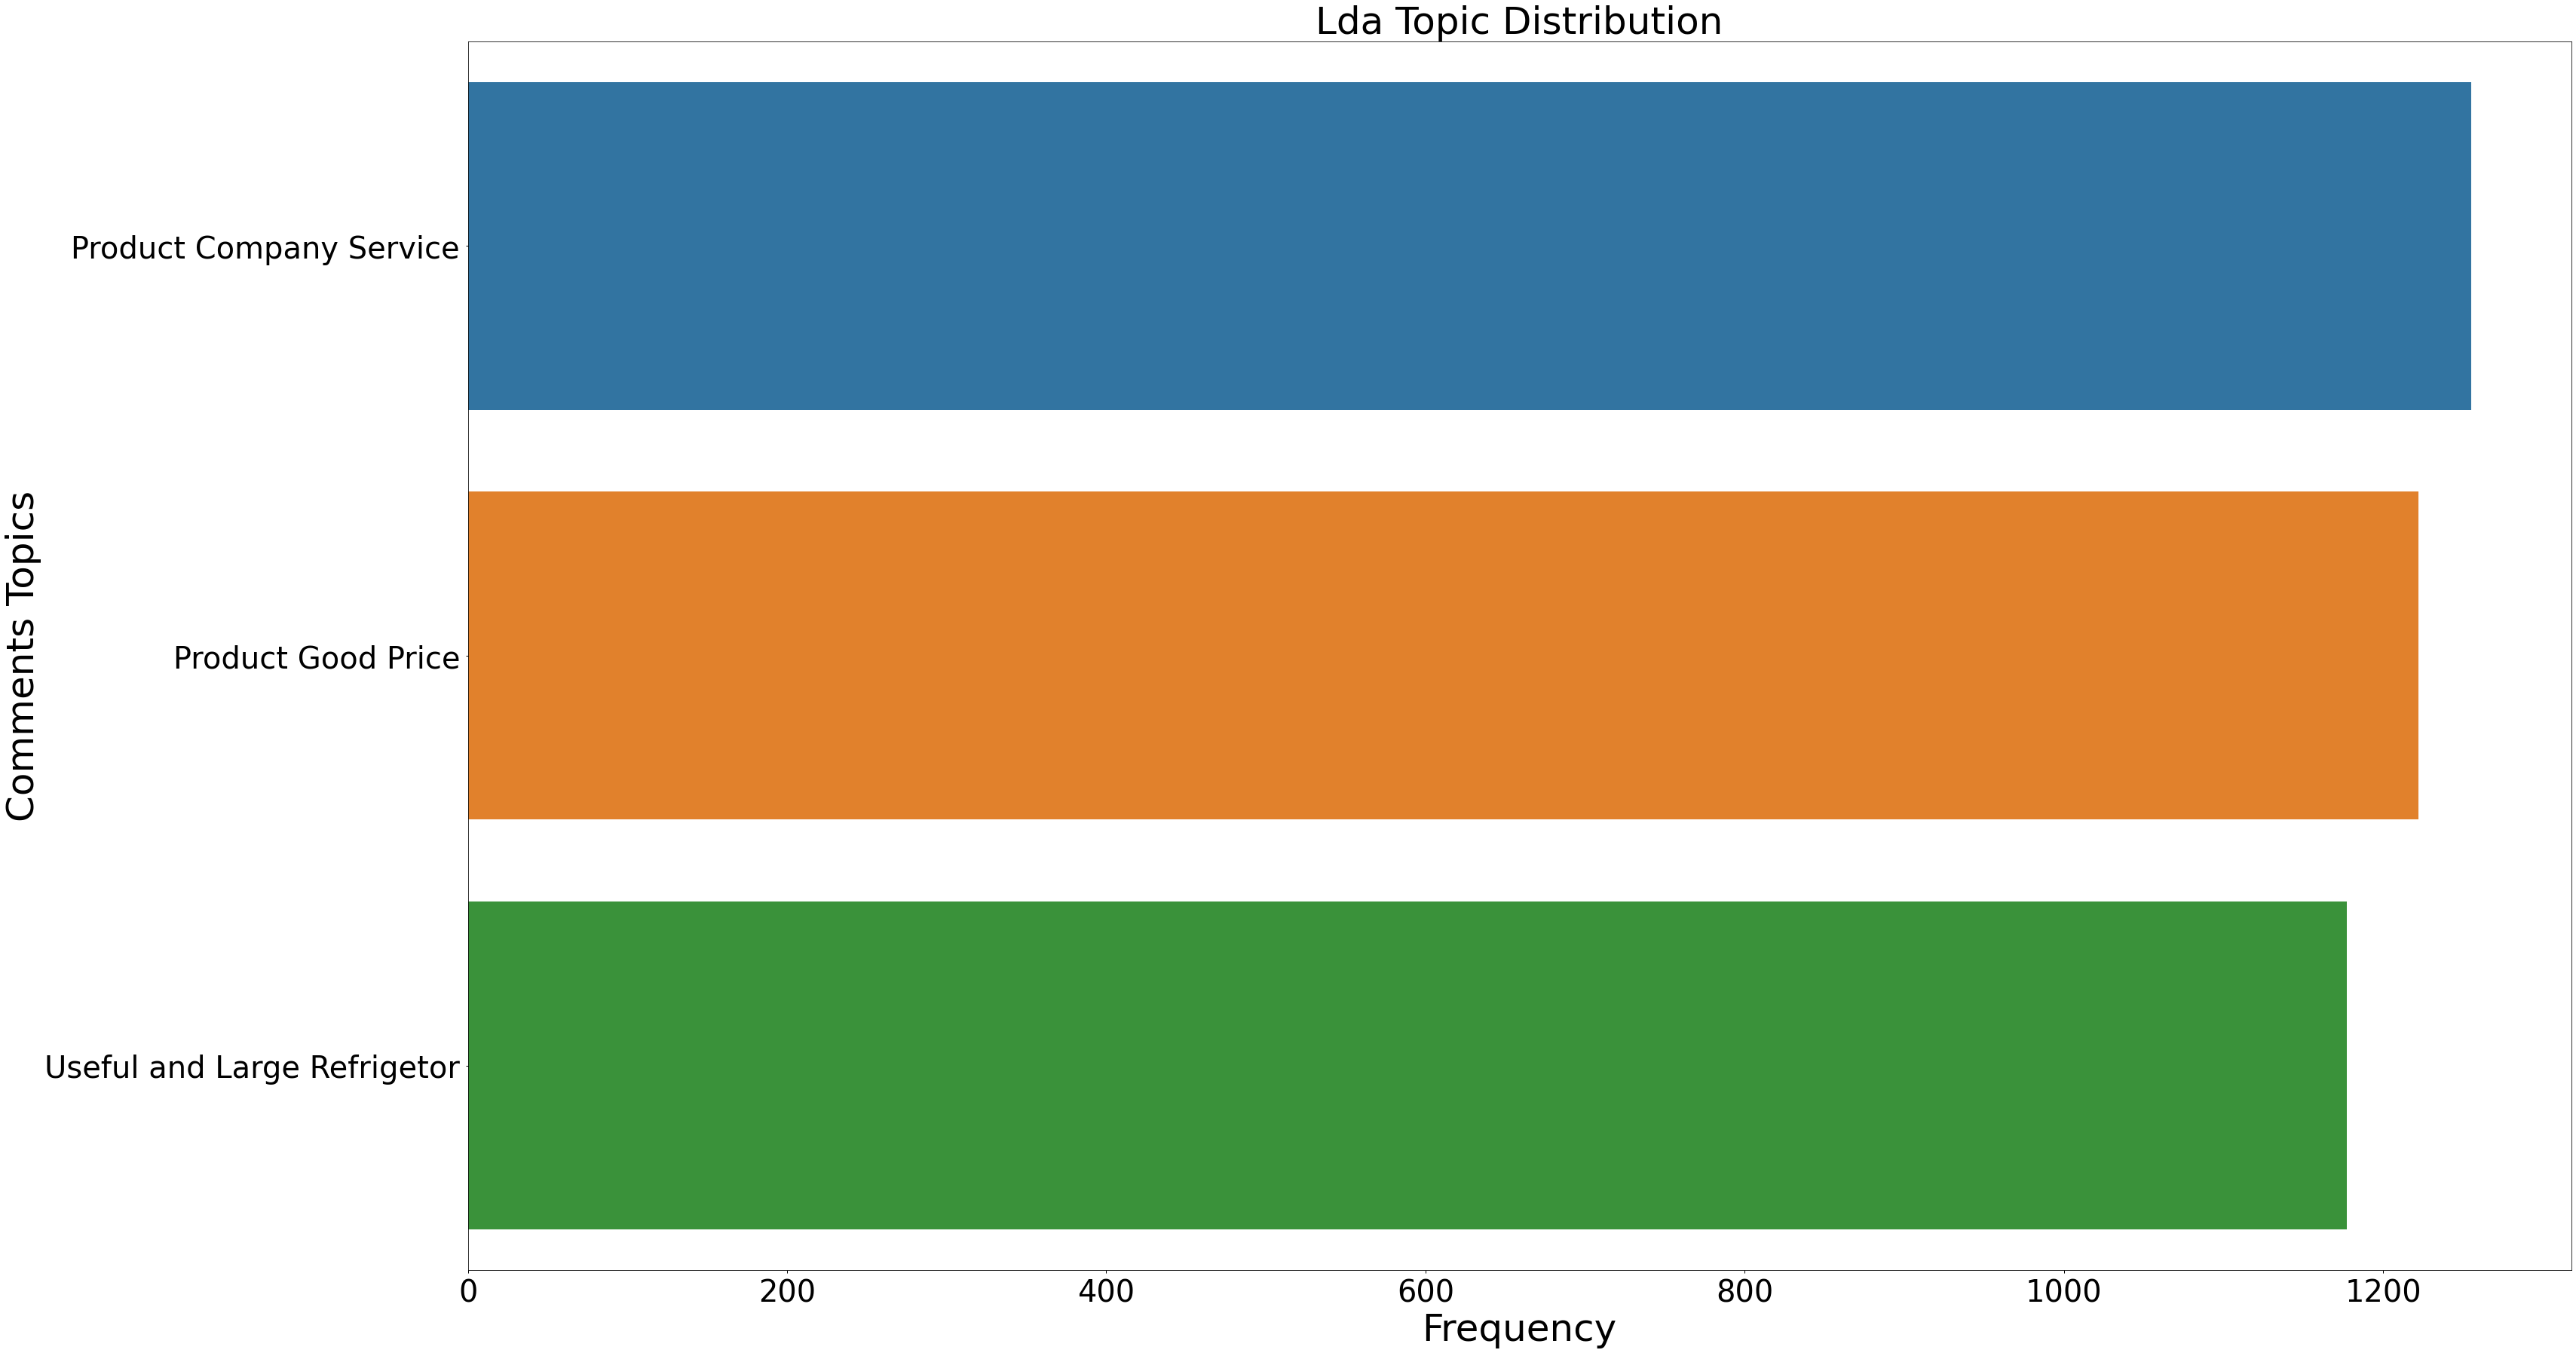

In [93]:
lda_x = analysis['lda_topics'].value_counts()
lda_y = lda_x.sort_index()
plt.figure(figsize=(50,30))
sns.barplot(lda_x, lda_y.index)
plt.title("Lda Topic Distribution", fontsize=50)
plt.ylabel('Comments Topics', fontsize=50)
plt.yticks(fontsize=40)
plt.xlabel('Frequency', fontsize=50)
plt.xticks(fontsize=40)

(array([   0.,  500., 1000., 1500., 2000., 2500., 3000.]),
 <a list of 7 Text major ticklabel objects>)

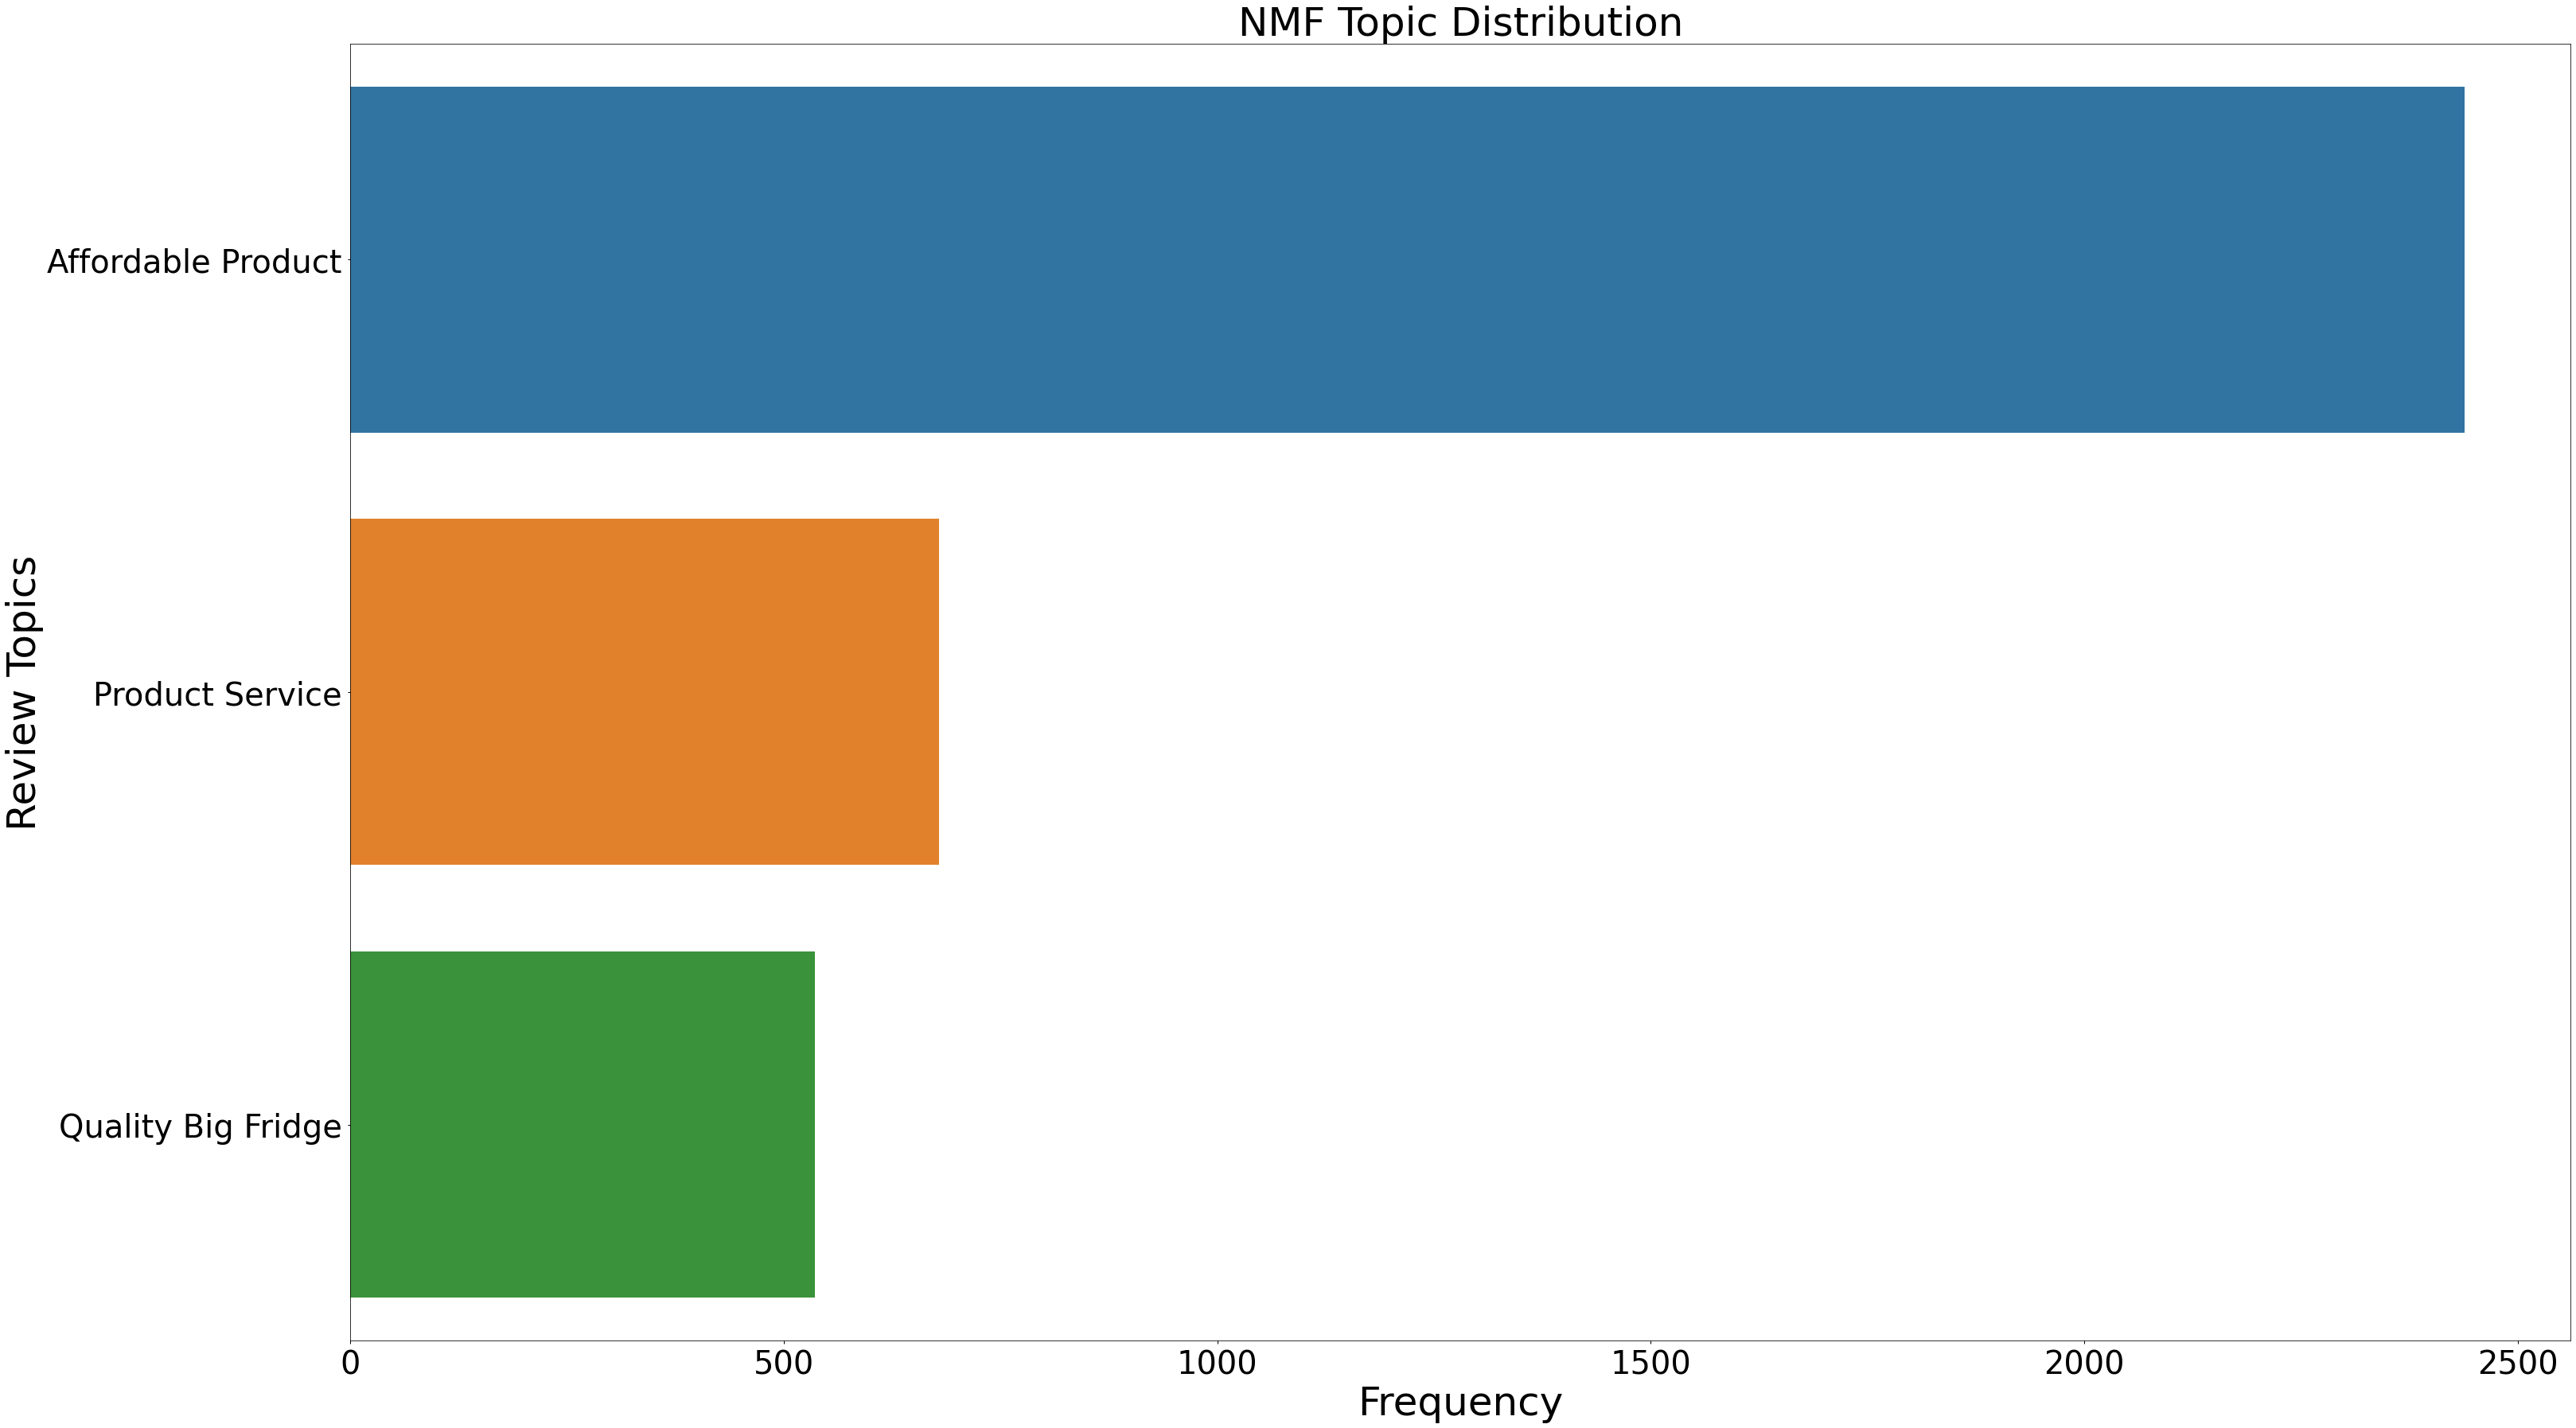

In [94]:
nmf_x = analysis['nmf_topics'].value_counts()
nmf_y = nmf_x.sort_index()
plt.figure(figsize=(50,30))
sns.barplot(nmf_x, nmf_y.index)
plt.title("NMF Topic Distribution", fontsize=50)
plt.ylabel('Review Topics', fontsize=50)
plt.yticks(fontsize=40)
plt.xlabel('Frequency', fontsize=50)
plt.xticks(fontsize=40)

# **Data Modeling**

In [95]:
X = analysis.lemma_str
y = analysis.sentiment

In [96]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [97]:
# you have to feed strings into a countvec
# max_df=0.9 we will remove words which appear in more than 90% of the reviews
# min_df=25 we will remove words which appear in less than 25 reviews
from sklearn.feature_extraction.text import CountVectorizer

cv1 = CountVectorizer(stop_words='english')

X_train_cv1 = cv1.fit_transform(X_train)
X_test_cv1  = cv1.transform(X_test)

pd.DataFrame(X_train_cv1.toarray(), columns=cv1.get_feature_names()).head()

,abandon,ability,able,abroad,absolutely,absorption,absurd,accept,accepted,accord,...,zerler,zero,çoni,çubuk,özbaş,ülkü,ülkügrup,şahan,şanlıurfa,ممتاز
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Logistic Regression Classifier**

In [98]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [99]:
lr.fit(X_train_cv1, y_train)
y_pred_cv1 = lr.predict(X_test_cv1)

In [100]:
# Create a function to calculate the error metrics, since we'll be doing this several times
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

def conf_matrix(actual, predicted):
    cm = confusion_matrix(actual, predicted)
    sns.heatmap(cm, xticklabels=['Pred_Negative','Pred_Neutral', 'Pred_Positive'], 
                yticklabels=['Act_Negative','Act_Neutral', 'Act_Positive'], annot=True,
                fmt='d', annot_kws={'fontsize':20}, cmap="YlGnBu");

    a_neg, a_neu, a_pos = cm[0]
    b_neg, b_neu, b_pos = cm[1]
    c_neg, c_neu, c_pos = cm[2]

    accuracy = round((a_neg + b_neu + c_pos) / (a_neg+a_neu+a_pos + b_neg+b_neu+b_pos + c_neg+c_neu+c_pos),2)
    negative = round((a_neg) / (a_neg+a_neu+a_pos),2)
    neutral = round((b_neu) / (b_neg+b_neu+b_pos),2)
    positive = round((c_pos) / (c_neg+c_neu+c_pos),2)

    cm_results = [accuracy, negative, neutral, positive]
    return cm_results

In [101]:
print(y_pred_cv1)


['Positive' 'Positive' 'Positive' ... 'Positive' 'Positive' 'Positive']


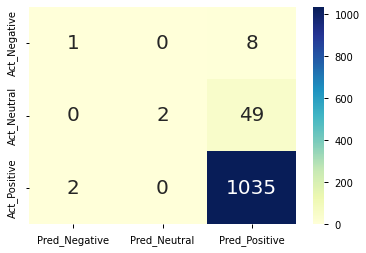

In [102]:
# The heat map for the first logistic regression model
cm1 = conf_matrix(y_test, y_pred_cv1)

**Naive Bayes Classifier**

In [103]:
# Fit the first Naive Bayes model
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()
mnb.fit(X_train_cv1, y_train)

y_pred_cv1_nb = mnb.predict(X_test_cv1)

In [104]:
# Fit the second Naive Bayes model
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()
bnb.fit(X_train_cv1, y_train)

y_pred_cv2_nb = bnb.predict(X_test_cv1)

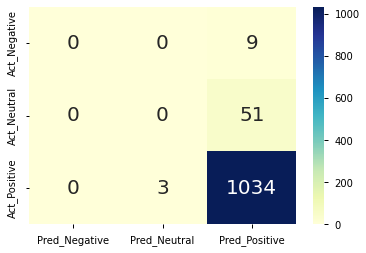

In [105]:
# Here's the heat map for the first Naive Bayes model
cm3 = conf_matrix(y_test, y_pred_cv1_nb)

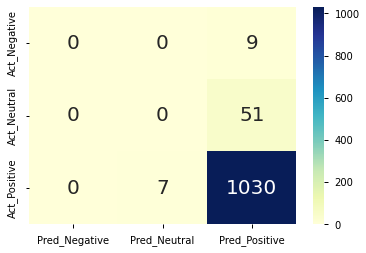

In [106]:
# Here's the heat map for the second Naive Bayes model
cm4 = conf_matrix(y_test, y_pred_cv2_nb)

**KNN Classifier**

In [107]:
from sklearn.neighbors import KNeighborsClassifier
# Fit the first KNN model
knn = KNeighborsClassifier(3)
knn.fit(X_train_cv1, y_train)

y_pred_cv1_knn = knn.predict(X_test_cv1)

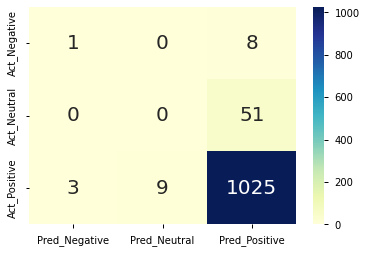

In [108]:
cm5 = conf_matrix(y_test, y_pred_cv1_knn)

**Try using TF-IDF instead of Count Vectorizer**

In [109]:
# Create TF-IDF versions of the Count Vectorizers created earlier in the exercise
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf1 = TfidfVectorizer(stop_words='english')
X_train_tfidf1 = tfidf1.fit_transform(X_train)
X_test_tfidf1  = tfidf1.transform(X_test)

**Logistic Regression**

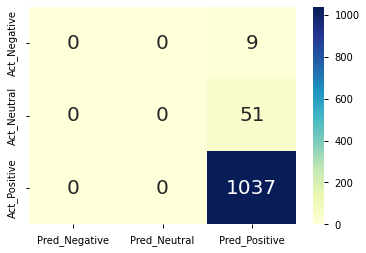

In [110]:
# Fit the first logistic regression on the TF-IDF data
lr.fit(X_train_tfidf1, y_train)
y_pred_tfidf1_lr = lr.predict(X_test_tfidf1)
cm6 = conf_matrix(y_test, y_pred_tfidf1_lr)

**Naive Bayes**

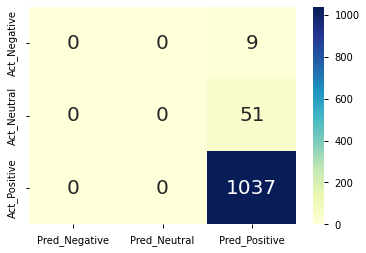

In [111]:
# Fit the first Naive Bayes model on the TF-IDF data
mnb.fit(X_train_tfidf1.toarray(), y_train)
y_pred_tfidf1_nb = mnb.predict(X_test_tfidf1)
cm7 = conf_matrix(y_test, y_pred_tfidf1_nb)

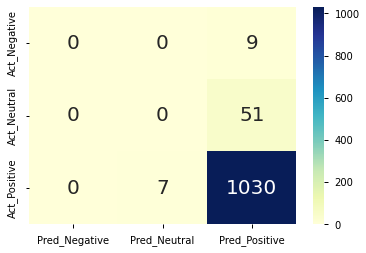

In [112]:
# Fit the second Naive Bayes model on the TF-IDF data
bnb.fit(X_train_tfidf1.toarray(), y_train)
y_pred_tfidf2_nb = bnb.predict(X_test_tfidf1)
cm8 = conf_matrix(y_test, y_pred_tfidf2_nb)


**KNN**

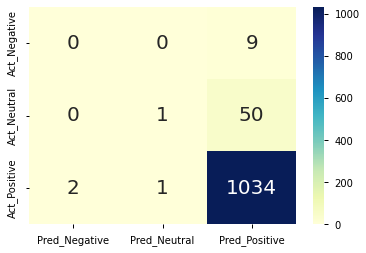

In [113]:
# Fit the first KNN model
knn = KNeighborsClassifier(3)
knn.fit(X_train_tfidf1.toarray(), y_train)
y_pred_cv1_tfidf_knn = knn.predict(X_test_tfidf1)
cm9 = conf_matrix(y_test, y_pred_cv1_tfidf_knn)

In [114]:
# Compile all of the error metrics into a dataframe for comparison
results_tf = pd.DataFrame(list(zip(cm1, cm3, cm4, cm5, cm6, cm7, cm8, cm9)))
results_tf = results_tf.set_index([['Accuracy', 'Negative Accuracy', 'Neutral Accuracy', 'Positive Accuracy']])
results_tf.columns = ['LR_CV', 'MNB_CV', 'BNB_CV', 'KNN_CV', 'LR_TFIDF', 'MNB_TFIDF', 'BNB_TFIDF', 'KNN_TFIDF']
results_tf

,LR_CV,MNB_CV,BNB_CV,KNN_CV,LR_TFIDF,MNB_TFIDF,BNB_TFIDF,KNN_TFIDF
Accuracy,0.95,0.94,0.94,0.94,0.95,0.95,0.94,0.94
Negative Accuracy,0.11,0.00,0.00,0.11,0.00,0.00,0.00,0.00
Neutral Accuracy,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.02
Positive Accuracy,1.00,1.00,0.99,0.99,1.00,1.00,0.99,1.00
